<a href="https://colab.research.google.com/github/PritamChakraborty-99/Upper-Limb-Time-Series-Analysis/blob/main/state_space_reconstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df_resultant = pd.read_csv('/content/resultant_trajectory.csv' )
#df_ycoodrinate = pd.read_csv('/content/RELATIVE_VERTICAL_DISPLACEMENT_FOR_ARNOLD_PRESS.csv' )

In [ ]:
print(df_resultant)

                                       start  \
0    (533.0663299560547, 409.44857597351074)   
1     (522.3558807373047, 411.6585445404053)   
2      (495.2077102661133, 406.609411239624)   
3     (484.8735809326172, 404.8578357696533)   
4    (479.86637115478516, 389.3060874938965)   
5     (484.1986846923828, 380.9908103942871)   
6     (481.2722396850586, 372.6163673400879)   
7     (472.6274871826172, 367.3798942565918)   
8    (457.34928131103516, 365.4046440124512)   
9    (443.0546569824219, 357.40553855895996)   
10     (422.7846145629883, 347.460994720459)   
11   (421.33201599121094, 337.3233890533447)   
12    (418.67626190185547, 317.828893661499)   
13   (410.0550079345703, 317.98994064331055)   
14    (393.5093307495117, 323.5060501098633)   
15   (384.0688705444336, 327.94318199157715)   
16    (368.7562942504883, 330.7455825805664)   
17   (368.5819625854492, 325.44530868530273)   
18  (361.38572692871094, 326.42088890075684)   
19   (359.15699005126953, 327.4287414550

In [ ]:
# Generate sample raw kinematic data (replace this with your own dataset)
df_x = pd.read_csv('/content/RELATIVE_HORIZONTAL_DISPLACEMENT_FOR_ARNOLD_PRESS_FOR_EACH_JOINT.csv' )
df_y = pd.read_csv('/content/RELATIVE_VERTICAL_DISPLACEMENT_FOR_ARNOLD_PRESS.csv' )
print(df_x)
print(df_y)

     Time (ms)       L-AI       L-TS         C7      R-TS      R-AI  \
0           12   0.000000   0.000000   0.000000  0.000000  0.000000   
1           42  -1.181252  -1.038773  -1.042994 -1.443043 -1.258934   
2           77  -2.338097  -2.013229  -2.103144 -2.959682 -2.453964   
3          111  -3.435028  -2.852295  -3.160561 -4.550636 -3.555290   
4          139  -4.433289  -3.478683  -4.168484 -6.152832 -4.559570   
..         ...        ...        ...        ...       ...       ...   
489      16345  20.422302  12.056976  12.377546  4.181042 -2.111572   
490      16392  21.418213  12.921555  13.197588  4.877377 -2.121033   
491      16418  22.346970  13.637802  13.888636  5.485149 -2.125839   
492      16444  23.213745  14.269318  14.447844  5.961460 -2.127464   
493      16497  24.042503  14.870934  14.923203  6.338146 -2.127304   

            T8  R-WRIST-JOINT  R-ELBOW-JOINT  
0     0.000000       0.000000       0.000000  
1    -1.596260      -4.792511      -2.963348  
2    -

In [ ]:
df_x = df_x.drop('Time (ms)', axis=1)
df_y = df_y.drop('Time (ms)', axis=1)

In [ ]:
print(df_x)
print(df_y)

          L-AI       L-TS         C7      R-TS      R-AI         T8  \
0     0.000000   0.000000   0.000000  0.000000  0.000000   0.000000   
1    -1.181252  -1.038773  -1.042994 -1.443043 -1.258934  -1.596260   
2    -2.338097  -2.013229  -2.103144 -2.959682 -2.453964  -3.076599   
3    -3.435028  -2.852295  -3.160561 -4.550636 -3.555290  -4.386860   
4    -4.433289  -3.478683  -4.168484 -6.152832 -4.559570  -5.527630   
..         ...        ...        ...       ...       ...        ...   
489  20.422302  12.056976  12.377546  4.181042 -2.111572   9.478784   
490  21.418213  12.921555  13.197588  4.877377 -2.121033  10.086560   
491  22.346970  13.637802  13.888636  5.485149 -2.125839  10.719967   
492  23.213745  14.269318  14.447844  5.961460 -2.127464  11.376918   
493  24.042503  14.870934  14.923203  6.338146 -2.127304  12.051155   

     R-WRIST-JOINT  R-ELBOW-JOINT  
0         0.000000       0.000000  
1        -4.792511      -2.963348  
2       -10.238235      -7.023392  
3  

In [ ]:
# prompt: plot df

# import matplotlib.pyplot as plt
# df.plot(kind='line', figsize=(10, 6))
# plt.xlabel('Time (s)')
# plt.ylabel('Acceleration (m/s^2)')
# plt.title('Sample Kinematic Data for Arnold Press')
# plt.show()


In [ ]:
# prompt: select Time (ms) column in df

df_x.columns
df_y.columns

Index(['L-AI', 'L-TS', 'C7', 'R-TS', 'R-AI', 'T8', 'R-WRIST-JOINT',
       'R-ELBOW-JOINT'],
      dtype='object')

In [ ]:
# prompt: select 'L-AI' column from df_x

l_ai_hor = df_x['L-AI']
l_ai_ver = df_y['L-AI']
l_TS_hor = df_x['L-TS']
l_TS_ver = df_y['L-TS']
C7_hor = df_x['C7']
C7_ver = df_y['C7']
T8_hor = df_x['T8']
T8_ver = df_y['T8']



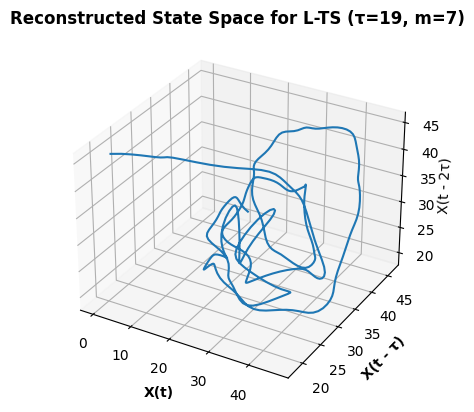

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load your shoulder joint displacement data here
# Example: load horizontal and vertical displacement data into x_data and y_data arrays

# Generate example data (replace this with your actual data)
# Example: generate synthetic data for demonstration purposes


# Calculate resultant displacement
resultant_data_l_ts = np.sqrt(l_TS_hor**2 + l_TS_ver**2)

# Parameters for state space reconstruction
embedding_dimension = 7  # Embedding dimension
time_delay = 19  # Time delay

# State space reconstruction
num_samples = len(resultant_data_l_ts) - (embedding_dimension - 1) * time_delay
X = np.zeros((num_samples, embedding_dimension))
for i in range(embedding_dimension):
    X[:, i] = resultant_data_l_ts[i * time_delay:i * time_delay + num_samples]

# Plot the reconstructed state space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X[:, 0], X[:, 1], X[:, 2])
ax.set_xlabel('X(t)',fontweight='bold')
ax.set_ylabel('X(t - τ)',fontweight='bold')
ax.set_zlabel('X(t - 2τ)',)
ax.zaxis.labelpad=-2
ax.set_title('Reconstructed State Space for L-TS (τ=19, m=7)',fontweight='bold')
plt.show()


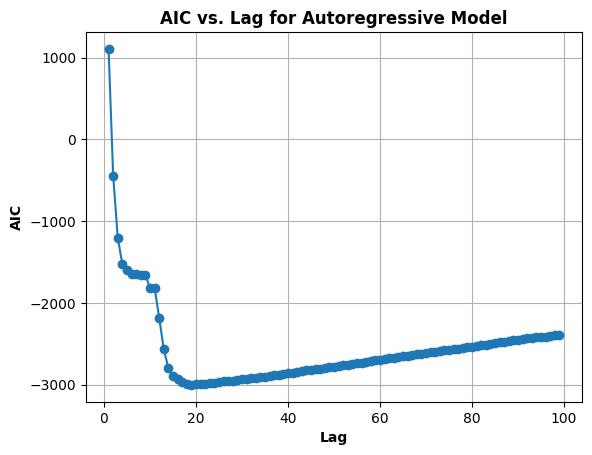

Optimal Lag (Time Delay): 19


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Generate or load your time series data
# For demonstration purposes, let's generate a simple sinusoidal signal

signal = resultant_data_l_ts

# Function to fit an autoregressive model and calculate AIC
def fit_ar_model(data, lag):
    model = AutoReg(data, lags=lag)
    model_fit = model.fit()
    return model_fit.aic

# Range of lags to consider
max_lag = 100
lags = np.arange(1, max_lag)

# Fit autoregressive models for different lags and calculate AIC
aic_values = [fit_ar_model(signal, lag) for lag in lags]

# Plot AIC values
plt.plot(lags, aic_values, marker='o')
plt.title('AIC vs. Lag for Autoregressive Model',fontweight='bold')
plt.xlabel('Lag',fontweight='bold')
plt.ylabel('AIC',fontweight='bold')
plt.grid(True)
plt.show()

# Find the lag with the lowest AIC value
optimal_lag = lags[np.argmin(aic_values)]
print("Optimal Lag (Time Delay):", optimal_lag)


<ipython-input-10-ec557b2c9751>:28: RuntimeWarning: divide by zero encountered in log
  correlation_dimension = np.log(correlation_sum) / np.log(radius)


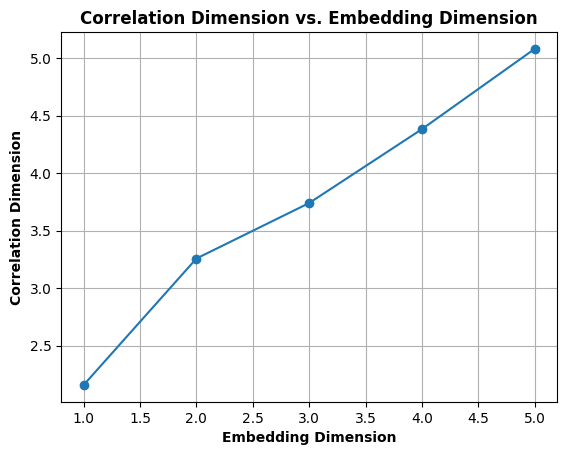

Optimal Embedding Dimension: 7


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:1238: RuntimeWarning: invalid value encountered in subtract
  out[tuple(slice1)] = (f[tuple(slice4)] - f[tuple(slice2)]) / (2. * ax_dx)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:1266: RuntimeWarning: invalid value encountered in scalar subtract
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_n


In [ ]:


# Generate or load your time series data
# For demonstration purposes, let's generate a simple sinusoidal signal

signal = resultant_data_l_ts

# Function to embed data in higher dimensions
def embed_data(data, dim):
    embedded_data = np.array([data[i:i+dim] for i in range(len(data)-dim+1)])
    return embedded_data

# Function to calculate correlation sum
def calculate_correlation_sum(data, dimension, radius):
    n = len(data)
    correlation_sum = 0
    for i in range(n):
        for j in range(i+1, n):
            distance = np.linalg.norm(data[i] - data[j])
            if distance <= radius:
                correlation_sum += 1
    return correlation_sum / (n * (n - 1) / 2)

# Function to calculate correlation dimension
def calculate_correlation_dimension(data, max_dim, radius):
    correlation_dimensions = []
    for dim in range(1, max_dim+1):
        embedded_data = embed_data(data, dim)
        correlation_sum = calculate_correlation_sum(embedded_data, dim, radius)
        correlation_dimension = np.log(correlation_sum) / np.log(radius)
        correlation_dimensions.append(correlation_dimension)
    return correlation_dimensions

# Set parameters
max_dim = 10  # Maximum embedding dimension to consider
radius = 0.1  # Radius for calculating correlation sum

# Calculate correlation dimension for each embedding dimension
correlation_dimensions = calculate_correlation_dimension(signal, max_dim, radius)

# Plot correlation dimensions
plt.plot(range(1, max_dim+1), correlation_dimensions, marker='o')
plt.title("Correlation Dimension vs. Embedding Dimension",fontweight='bold')
plt.xlabel("Embedding Dimension",fontweight='bold')
plt.ylabel("Correlation Dimension",fontweight='bold')
plt.grid(True)
plt.show()

# Find the embedding dimension where the correlation dimension plateaus
optimal_dim = np.argmax(np.gradient(correlation_dimensions)) + 1
print("Optimal Embedding Dimension:", optimal_dim)

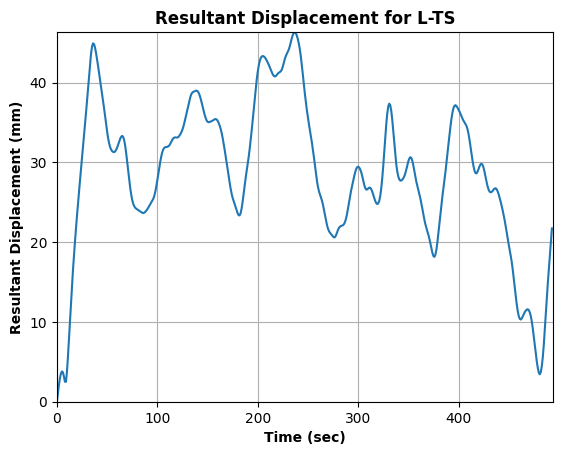

In [ ]:
# prompt: plot resultant_data_l_ts with plot boundary start from axes

import matplotlib.pyplot as plt
plt.plot(resultant_data_l_ts)
plt.xlabel('Time (sec)',fontweight='bold')
plt.ylabel('Resultant Displacement (mm)',fontweight='bold')
plt.title('Resultant Displacement for L-TS',fontweight='bold')
plt.axis([0, len(resultant_data_l_ts), 0, max(resultant_data_l_ts)])
plt.grid(True) # Set the plot boundaries
plt.show()


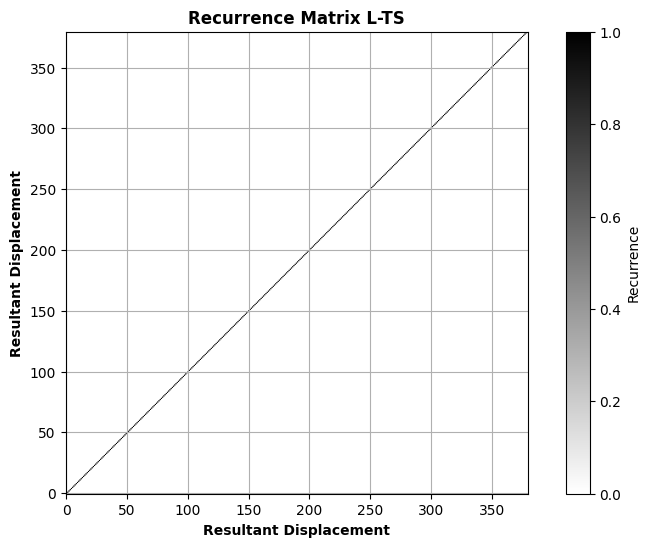

Recurrence Rate: 0.002631578947368421
Determinism: 190.5
Average Diagonal Length: 190.5
Maximum Diagonal Length: 380


In [ ]:
#L-TS
import numpy as np
import matplotlib.pyplot as plt

def state_space_reconstruction(series, embedding_dimension, time_delay):
    """
    Perform state space reconstruction using time delay embedding.

    Parameters:
        series (ndarray): Input time series.
        embedding_dimension (int): Dimension of the reconstructed state space.
        time_delay (int): Time delay used for embedding.

    Returns:
        ndarray: Reconstructed state space.
    """
    N = len(series)
    embedded_space = np.zeros((N - (embedding_dimension - 1) * time_delay, embedding_dimension))

    for i in range(embedding_dimension):
        embedded_space[:, i] = series[i * time_delay : i * time_delay + len(embedded_space)]

    return embedded_space

def calculate_recurrence_matrix(state_space, threshold):
    """
    Calculate recurrence matrix based on the state space.

    Parameters:
        state_space (ndarray): Reconstructed state space.
        threshold (float): Recurrence threshold.

    Returns:
        ndarray: Recurrence matrix.
    """
    N = len(state_space)
    recurrence_matrix = np.zeros((N, N))

    for i in range(N):
        for j in range(N):
            if np.linalg.norm(state_space[i] - state_space[j]) < threshold:
                recurrence_matrix[i, j] = 1

    return recurrence_matrix

def calculate_recurrence_quantification_measures(recurrence_matrix):
    """
    Calculate recurrence quantification measures.

    Parameters:
        recurrence_matrix (ndarray): Recurrence matrix.

    Returns:
        float: Recurrence rate.
        float: Determinism.
        float: Average diagonal line length.
        float: Maximum diagonal line length.
    """
    N = len(recurrence_matrix)
    num_recurrences = np.sum(recurrence_matrix)

    recurrence_rate = num_recurrences / (N * N)

    diagonal_lengths = []
    for i in range(N):
        j = i
        length = 0
        while j < N and recurrence_matrix[j, j] == 1:
            length += 1
            j += 1
        if length > 0:
            diagonal_lengths.append(length)

    determinism = np.sum(np.array(diagonal_lengths)) / num_recurrences

    if len(diagonal_lengths) > 0:
        avg_diagonal_length = np.mean(diagonal_lengths)
        max_diagonal_length = np.max(diagonal_lengths)
    else:
        avg_diagonal_length = 0
        max_diagonal_length = 0

    return recurrence_rate, determinism, avg_diagonal_length, max_diagonal_length

# Generate example time series


x = resultant_data_l_ts

# Parameters for state space reconstruction
embedding_dimension = 7
time_delay = 19

# Parameters for recurrence quantification analysis
threshold = 0.1

# Perform state space reconstruction
state_space = state_space_reconstruction(x, embedding_dimension, time_delay)

# Calculate recurrence matrix
recurrence_matrix = calculate_recurrence_matrix(state_space, threshold)

# Calculate recurrence quantification measures
recurrence_rate, determinism, avg_diagonal_length, max_diagonal_length = calculate_recurrence_quantification_measures(recurrence_matrix)

# Plotting
plt.figure(figsize=(10, 6))
plt.imshow(recurrence_matrix, cmap='binary', origin='lower')
plt.title('Recurrence Matrix L-TS',fontweight='bold')
plt.xlabel('Resultant Displacement',fontweight='bold')
plt.ylabel('Resultant Displacement',fontweight='bold')
plt.colorbar(label='Recurrence')
plt.grid(True)
plt.show()

print("Recurrence Rate:", recurrence_rate)
print("Determinism:", determinism)
print("Average Diagonal Length:", avg_diagonal_length)
print("Maximum Diagonal Length:", max_diagonal_length)

In [ ]:
import numpy as np

def euclidean_distance(x, y):
    """
    Calculate the Euclidean distance between two points x and y.
    """
    return np.sqrt(np.sum((x - y)**2))

def recurrence_matrix(time_series, threshold):
    """
    Generate a binary recurrence matrix based on the given time series and threshold.
    """
    n = len(time_series)
    R = np.zeros((n, n), dtype=int)
    for i in range(n):
        for j in range(n):
            if euclidean_distance(time_series[i], time_series[j]) < threshold:
                R[i, j] = 1
    return R

def recurrence_entropy(time_series, threshold, dimension):
    """
    Compute the recurrence entropy of the given time series.
    """
    R = recurrence_matrix(time_series, threshold)
    n = len(R)
    m = dimension

    # Count the number of recurrent points for each point in the time series
    recurrent_points = np.sum(R, axis=1)

    # Calculate the probability distribution of recurrence points
    prob = recurrent_points / n

    # Compute the recurrence entropy
    entropy = 0
    for i in range(n):
        if prob[i] > 0:
            entropy += prob[i] * np.log(prob[i])

    return -entropy

# Example usage:
# Assuming you have a time series 'data' which is a numpy array of shape (N, d)
# where N is the number of data points and d is the dimensionality of each point.

# Set the parameters
threshold = 0.1  # Adjust according to your specific problem
embedding_dimension = 7  # Adjust according to your specific problem

# Compute recurrence entropy
entropy = recurrence_entropy(resultant_data_l_ts, threshold, embedding_dimension)
print("Recurrence Entropy L-TS:", entropy)


Recurrence Entropy L-TS: 20.178030701744447


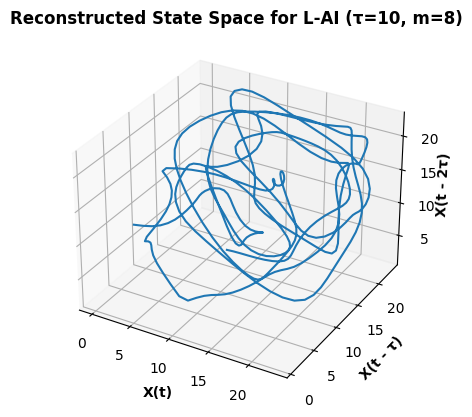

In [ ]:
# Calculate resultant displacement
# l_ai
resultant_data = np.sqrt(l_ai_hor**2 + l_ai_ver**2)

# Parameters for state space reconstruction
embedding_dimension = 8  # Embedding dimension
time_delay = 10  # Time delay

# State space reconstruction
num_samples = len(resultant_data) - (embedding_dimension - 1) * time_delay
X = np.zeros((num_samples, embedding_dimension))
for i in range(embedding_dimension):
    X[:, i] = resultant_data[i * time_delay:i * time_delay + num_samples]

# Plot the reconstructed state space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X[:, 0], X[:, 1], X[:, 2])
ax.set_xlabel('X(t)',fontweight='bold')
ax.set_ylabel('X(t - τ)',fontweight='bold')
ax.set_zlabel('X(t - 2τ)',fontweight='bold')
ax.zaxis.labelpad=-2
ax.set_title('Reconstructed State Space for L-AI (τ=10, m=8)',fontweight='bold')
plt.show()


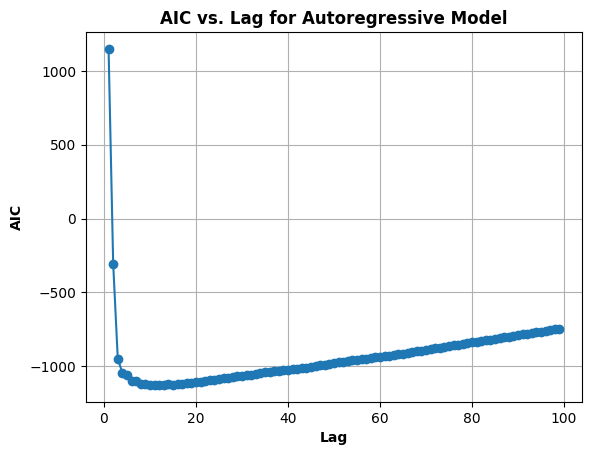

Optimal Lag (Time Delay): 10


In [ ]:
#l-ai
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Generate or load your time series data
# For demonstration purposes, let's generate a simple sinusoidal signal

signal = resultant_data

# Function to fit an autoregressive model and calculate AIC
def fit_ar_model(data, lag):
    model = AutoReg(data, lags=lag)
    model_fit = model.fit()
    return model_fit.aic

# Range of lags to consider
max_lag = 100
lags = np.arange(1, max_lag)

# Fit autoregressive models for different lags and calculate AIC
aic_values = [fit_ar_model(signal, lag) for lag in lags]

# Plot AIC values
plt.plot(lags, aic_values, marker='o')
plt.title('AIC vs. Lag for Autoregressive Model',fontweight='bold')
plt.xlabel('Lag',fontweight='bold')
plt.ylabel('AIC',fontweight='bold')
plt.grid(True)
plt.show()

# Find the lag with the lowest AIC value
optimal_lag = lags[np.argmin(aic_values)]
print("Optimal Lag (Time Delay):", optimal_lag)


<ipython-input-16-10ff44a1ef94>:28: RuntimeWarning: divide by zero encountered in log
  correlation_dimension = np.log(correlation_sum) / np.log(radius)


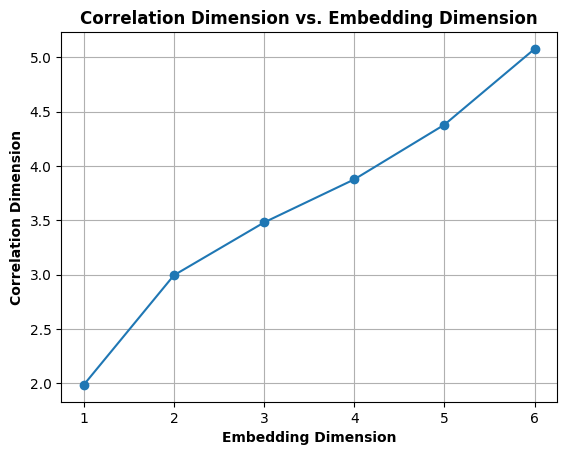

Optimal Embedding Dimension: 8


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:1238: RuntimeWarning: invalid value encountered in subtract
  out[tuple(slice1)] = (f[tuple(slice4)] - f[tuple(slice2)]) / (2. * ax_dx)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:1266: RuntimeWarning: invalid value encountered in scalar subtract
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_n


In [ ]:


# Generate or load your time series data
# For demonstration purposes, let's generate a simple sinusoidal signal

signal = resultant_data

# Function to embed data in higher dimensions
def embed_data(data, dim):
    embedded_data = np.array([data[i:i+dim] for i in range(len(data)-dim+1)])
    return embedded_data

# Function to calculate correlation sum
def calculate_correlation_sum(data, dimension, radius):
    n = len(data)
    correlation_sum = 0
    for i in range(n):
        for j in range(i+1, n):
            distance = np.linalg.norm(data[i] - data[j])
            if distance <= radius:
                correlation_sum += 1
    return correlation_sum / (n * (n - 1) / 2)

# Function to calculate correlation dimension
def calculate_correlation_dimension(data, max_dim, radius):
    correlation_dimensions = []
    for dim in range(1, max_dim+1):
        embedded_data = embed_data(data, dim)
        correlation_sum = calculate_correlation_sum(embedded_data, dim, radius)
        correlation_dimension = np.log(correlation_sum) / np.log(radius)
        correlation_dimensions.append(correlation_dimension)
    return correlation_dimensions

# Set parameters
max_dim = 10  # Maximum embedding dimension to consider
radius = 0.1  # Radius for calculating correlation sum

# Calculate correlation dimension for each embedding dimension
correlation_dimensions = calculate_correlation_dimension(signal, max_dim, radius)

# Plot correlation dimensions
plt.plot(range(1, max_dim+1), correlation_dimensions, marker='o')
plt.title("Correlation Dimension vs. Embedding Dimension",fontweight='bold')
plt.xlabel("Embedding Dimension",fontweight='bold')
plt.ylabel("Correlation Dimension",fontweight='bold')
plt.grid(True)
plt.show()

# Find the embedding dimension where the correlation dimension plateaus
optimal_dim = np.argmax(np.gradient(correlation_dimensions)) + 1
print("Optimal Embedding Dimension:", optimal_dim)


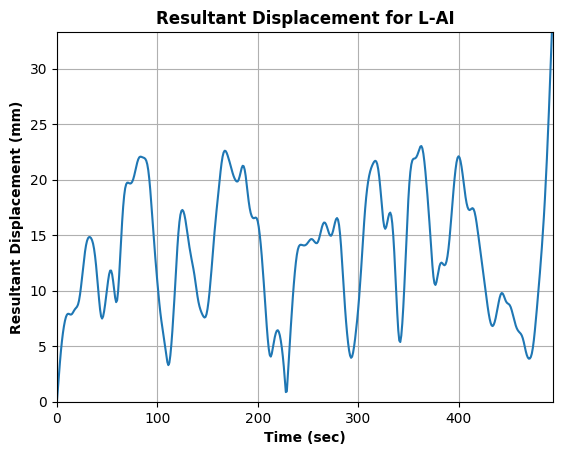

In [ ]:
# prompt: plot resultant_data_l_ts with plot boundary start from axes

import matplotlib.pyplot as plt
plt.plot(resultant_data)
plt.xlabel('Time (sec)',fontweight='bold')
plt.ylabel('Resultant Displacement (mm)',fontweight='bold')
plt.title('Resultant Displacement for L-AI',fontweight='bold')
plt.axis([0, len(resultant_data), 0, max(resultant_data)])
plt.grid(True)  # Set the plot boundaries
plt.show()

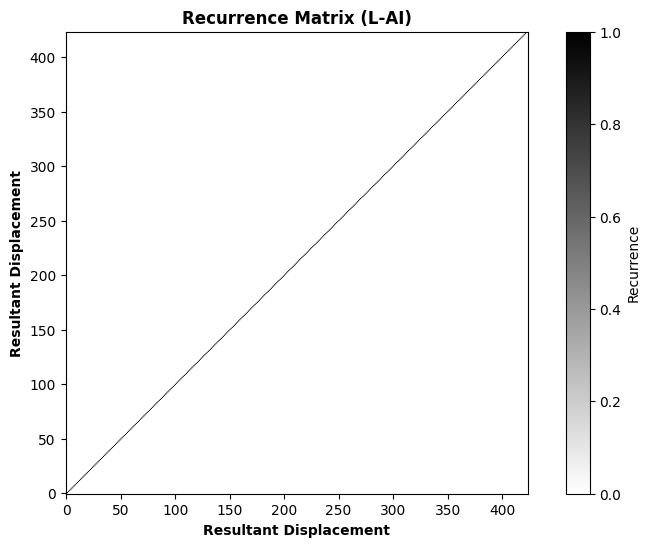

Recurrence Rate: 0.0023584905660377358
Determinism: 212.5
Average Diagonal Length: 212.5
Maximum Diagonal Length: 424


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def state_space_reconstruction(series, embedding_dimension, time_delay):
    """
    Perform state space reconstruction using time delay embedding.

    Parameters:
        series (ndarray): Input time series.
        embedding_dimension (int): Dimension of the reconstructed state space.
        time_delay (int): Time delay used for embedding.

    Returns:
        ndarray: Reconstructed state space.
    """
    N = len(series)
    embedded_space = np.zeros((N - (embedding_dimension - 1) * time_delay, embedding_dimension))

    for i in range(embedding_dimension):
        embedded_space[:, i] = series[i * time_delay : i * time_delay + len(embedded_space)]

    return embedded_space

def calculate_recurrence_matrix(state_space, threshold):
    """
    Calculate recurrence matrix based on the state space.

    Parameters:
        state_space (ndarray): Reconstructed state space.
        threshold (float): Recurrence threshold.

    Returns:
        ndarray: Recurrence matrix.
    """
    N = len(state_space)
    recurrence_matrix = np.zeros((N, N))

    for i in range(N):
        for j in range(N):
            if np.linalg.norm(state_space[i] - state_space[j]) < threshold:
                recurrence_matrix[i, j] = 1

    return recurrence_matrix

def calculate_recurrence_quantification_measures(recurrence_matrix):
    """
    Calculate recurrence quantification measures.

    Parameters:
        recurrence_matrix (ndarray): Recurrence matrix.

    Returns:
        float: Recurrence rate.
        float: Determinism.
        float: Average diagonal line length.
        float: Maximum diagonal line length.
    """
    N = len(recurrence_matrix)
    num_recurrences = np.sum(recurrence_matrix)

    recurrence_rate = num_recurrences / (N * N)

    diagonal_lengths = []
    for i in range(N):
        j = i
        length = 0
        while j < N and recurrence_matrix[j, j] == 1:
            length += 1
            j += 1
        if length > 0:
            diagonal_lengths.append(length)

    determinism = np.sum(np.array(diagonal_lengths)) / num_recurrences

    if len(diagonal_lengths) > 0:
        avg_diagonal_length = np.mean(diagonal_lengths)
        max_diagonal_length = np.max(diagonal_lengths)
    else:
        avg_diagonal_length = 0
        max_diagonal_length = 0

    return recurrence_rate, determinism, avg_diagonal_length, max_diagonal_length

# Generate example time series


x = resultant_data

# Parameters for state space reconstruction
embedding_dimension = 8
time_delay = 10

# Parameters for recurrence quantification analysis
threshold = 0.1

# Perform state space reconstruction
state_space = state_space_reconstruction(x, embedding_dimension, time_delay)

# Calculate recurrence matrix
recurrence_matrix = calculate_recurrence_matrix(state_space, threshold)

# Calculate recurrence quantification measures
recurrence_rate, determinism, avg_diagonal_length, max_diagonal_length = calculate_recurrence_quantification_measures(recurrence_matrix)

# Plotting
plt.figure(figsize=(10, 6))
plt.imshow(recurrence_matrix, cmap='binary', origin='lower')
plt.title('Recurrence Matrix (L-AI)',fontweight='bold')
plt.xlabel('Resultant Displacement',fontweight='bold')
plt.ylabel('Resultant Displacement',fontweight='bold')
plt.colorbar(label='Recurrence')
plt.show()

print("Recurrence Rate:", recurrence_rate)
print("Determinism:", determinism)
print("Average Diagonal Length:", avg_diagonal_length)
print("Maximum Diagonal Length:", max_diagonal_length)

In [ ]:
import numpy as np

def euclidean_distance(x, y):
    """
    Calculate the Euclidean distance between two points x and y.
    """
    return np.sqrt(np.sum((x - y)**2))

def recurrence_matrix(time_series, threshold):
    """
    Generate a binary recurrence matrix based on the given time series and threshold.
    """
    n = len(time_series)
    R = np.zeros((n, n), dtype=int)
    for i in range(n):
        for j in range(n):
            if euclidean_distance(time_series[i], time_series[j]) < threshold:
                R[i, j] = 1
    return R

def recurrence_entropy(time_series, threshold, dimension):
    """
    Compute the recurrence entropy of the given time series.
    """
    R = recurrence_matrix(time_series, threshold)
    n = len(R)
    m = dimension

    # Count the number of recurrent points for each point in the time series
    recurrent_points = np.sum(R, axis=1)

    # Calculate the probability distribution of recurrence points
    prob = recurrent_points / n

    # Compute the recurrence entropy
    entropy = 0
    for i in range(n):
        if prob[i] > 0:
            entropy += prob[i] * np.log(prob[i])

    return -entropy

# Example usage:
# Assuming you have a time series 'data' which is a numpy array of shape (N, d)
# where N is the number of data points and d is the dimensionality of each point.

# Set the parameters
threshold = 0.1  # Adjust according to your specific problem
embedding_dimension = 8  # Adjust according to your specific problem

# Compute recurrence entropy
entropy = recurrence_entropy(resultant_data, threshold, embedding_dimension)
print("Recurrence Entropy L-AI:", entropy)

Recurrence Entropy L-AI: 26.182216442546554


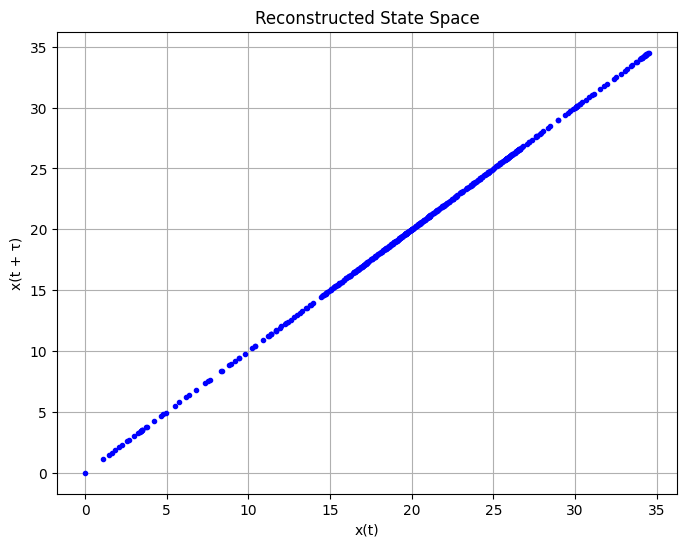

In [ ]:


import numpy as np
import matplotlib.pyplot as plt



# Function to perform state space reconstruction
def state_space_reconstruction(data, embedding_dim, time_delay):
    N = len(data)
    embedded_data = np.zeros((N - (embedding_dim - 1) * time_delay, embedding_dim))

    for i in range(embedding_dim):
        embedded_data[:, i] = data[i * time_delay:N - (embedding_dim - i - 1) * time_delay]

    return embedded_data

# Generate example time series data (you can replace this with your own data)


# Calculate resultant displacement
resultant_data_c7 = np.sqrt(C7_hor**2 + C7_ver**2)
data = resultant_data_c7

# Parameters for state space reconstruction
embedding_dim = 1  # Minimum embedding dimension
optimal_time_delay = 8  # Optimal time delay (you may need to adjust this)

# Perform state space reconstruction
embedded_data = state_space_reconstruction(data, embedding_dim, optimal_time_delay)

# Plot the reconstructed state space
plt.figure(figsize=(8, 6))
plt.plot(embedded_data[:, 0], embedded_data[:, 0], 'b.')  # Plot the state space
plt.title('Reconstructed State Space')
plt.xlabel('x(t)')
plt.ylabel('x(t + τ)')
plt.grid(True)
plt.show()




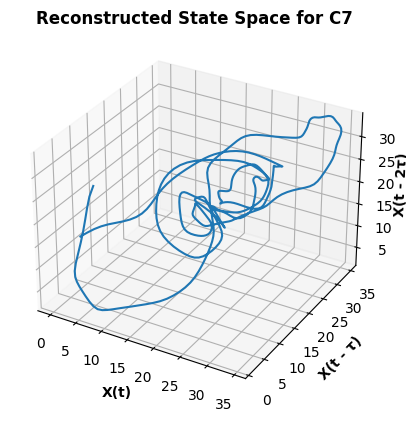

In [ ]:
# Load your shoulder joint displacement data here
# Example: load horizontal and vertical displacement data into x_data and y_data arrays

# Generate example data (replace this with your actual data)
# Example: generate synthetic data for demonstration purposes


# Calculate resultant displacement
resultant_data_c7 = np.sqrt(C7_hor**2 + C7_ver**2)


# Parameters for state space reconstruction
embedding_dimension = 3  # Embedding dimension
time_delay = 8  # Time delay

# State space reconstruction
num_samples = len(resultant_data_c7) - (embedding_dimension - 1) * time_delay
X = np.zeros((num_samples, embedding_dimension))
for i in range(embedding_dimension):
    X[:, i] = resultant_data_c7[i * time_delay:i * time_delay + num_samples]

# Plot the reconstructed state space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X[:, 0], X[:, 1], X[:, 2])
ax.set_xlabel('X(t)',fontweight='bold')
ax.set_ylabel('X(t - τ)',fontweight='bold')
ax.set_zlabel('X(t - 2τ)',fontweight='bold')
ax.zaxis.labelpad=-2
ax.set_title('Reconstructed State Space for C7',fontweight='bold')
plt.show()

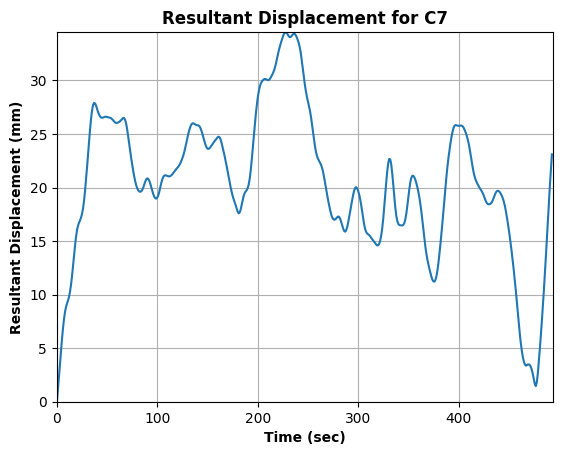

In [ ]:
# prompt: plot resultant_data_l_ts with plot boundary start from axes

import matplotlib.pyplot as plt
plt.plot(resultant_data_c7)
plt.xlabel('Time (sec)',fontweight='bold')
plt.ylabel('Resultant Displacement (mm)',fontweight='bold')
plt.title('Resultant Displacement for C7',fontweight='bold')
plt.axis([0, len(resultant_data_c7), 0, max(resultant_data_c7)])
plt.grid(True)  # Set the plot boundaries
plt.show()



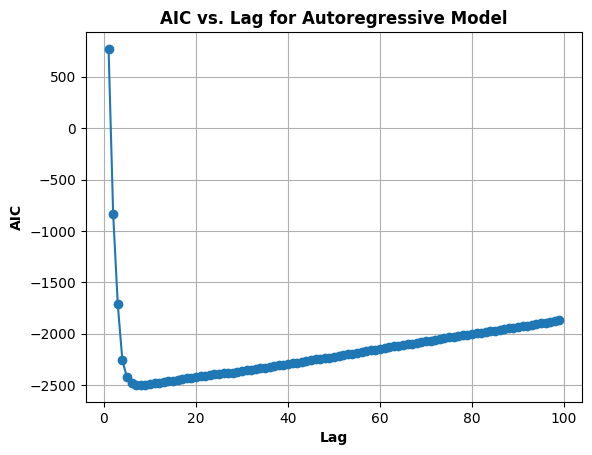

Optimal Lag (Time Delay): 8


In [ ]:
#c7

import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Generate or load your time series data
# For demonstration purposes, let's generate a simple sinusoidal signal

signal = resultant_data_c7

# Function to fit an autoregressive model and calculate AIC
def fit_ar_model(data, lag):
    model = AutoReg(data, lags=lag)
    model_fit = model.fit()
    return model_fit.aic

# Range of lags to consider
max_lag = 100
lags = np.arange(1, max_lag)

# Fit autoregressive models for different lags and calculate AIC
aic_values = [fit_ar_model(signal, lag) for lag in lags]

# Plot AIC values
plt.plot(lags, aic_values, marker='o')
plt.title('AIC vs. Lag for Autoregressive Model',fontweight='bold')
plt.xlabel('Lag',fontweight='bold')
plt.ylabel('AIC',fontweight='bold')
plt.grid(True)
plt.show()

# Find the lag with the lowest AIC value
optimal_lag = lags[np.argmin(aic_values)]
print("Optimal Lag (Time Delay):", optimal_lag)


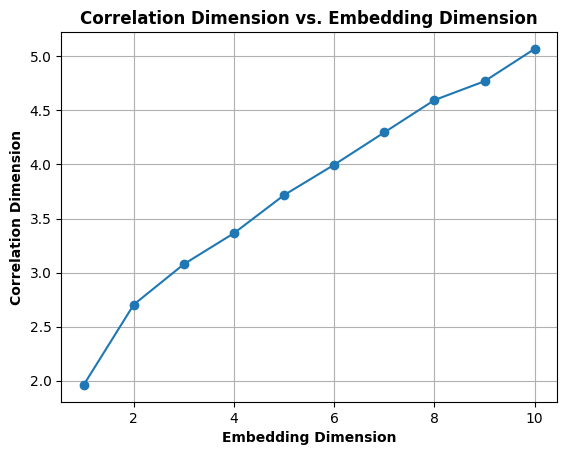

Optimal Embedding Dimension: 1


In [ ]:
# Generate or load your time series data
# For demonstration purposes, let's generate a simple sinusoidal signal

signal = resultant_data_c7

# Function to embed data in higher dimensions
def embed_data(data, dim):
    embedded_data = np.array([data[i:i+dim] for i in range(len(data)-dim+1)])
    return embedded_data

# Function to calculate correlation sum
def calculate_correlation_sum(data, dimension, radius):
    n = len(data)
    correlation_sum = 0
    for i in range(n):
        for j in range(i+1, n):
            distance = np.linalg.norm(data[i] - data[j])
            if distance <= radius:
                correlation_sum += 1
    return correlation_sum / (n * (n - 1) / 2)

# Function to calculate correlation dimension
def calculate_correlation_dimension(data, max_dim, radius):
    correlation_dimensions = []
    for dim in range(1, max_dim+1):
        embedded_data = embed_data(data, dim)
        correlation_sum = calculate_correlation_sum(embedded_data, dim, radius)
        correlation_dimension = np.log(correlation_sum) / np.log(radius)
        correlation_dimensions.append(correlation_dimension)
    return correlation_dimensions

# Set parameters
max_dim = 10  # Maximum embedding dimension to consider
radius = 0.1  # Radius for calculating correlation sum

# Calculate correlation dimension for each embedding dimension
correlation_dimensions = calculate_correlation_dimension(signal, max_dim, radius)

# Plot correlation dimensions
plt.plot(range(1, max_dim+1), correlation_dimensions, marker='o')
plt.title("Correlation Dimension vs. Embedding Dimension",fontweight='bold')
plt.xlabel("Embedding Dimension",fontweight='bold')
plt.ylabel("Correlation Dimension",fontweight='bold')
plt.grid(True)
plt.show()

# Find the embedding dimension where the correlation dimension plateaus
optimal_dim = np.argmax(np.gradient(correlation_dimensions)) + 1
print("Optimal Embedding Dimension:", optimal_dim)

<ipython-input-25-10ff44a1ef94>:28: RuntimeWarning: divide by zero encountered in log
  correlation_dimension = np.log(correlation_sum) / np.log(radius)


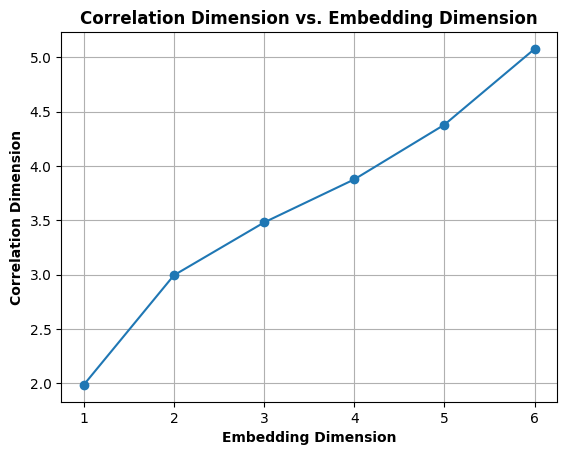

Optimal Embedding Dimension: 8


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:1238: RuntimeWarning: invalid value encountered in subtract
  out[tuple(slice1)] = (f[tuple(slice4)] - f[tuple(slice2)]) / (2. * ax_dx)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:1266: RuntimeWarning: invalid value encountered in scalar subtract
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_n


In [ ]:
# Generate or load your time series data
# For demonstration purposes, let's generate a simple sinusoidal signal

signal = resultant_data

# Function to embed data in higher dimensions
def embed_data(data, dim):
    embedded_data = np.array([data[i:i+dim] for i in range(len(data)-dim+1)])
    return embedded_data

# Function to calculate correlation sum
def calculate_correlation_sum(data, dimension, radius):
    n = len(data)
    correlation_sum = 0
    for i in range(n):
        for j in range(i+1, n):
            distance = np.linalg.norm(data[i] - data[j])
            if distance <= radius:
                correlation_sum += 1
    return correlation_sum / (n * (n - 1) / 2)

# Function to calculate correlation dimension
def calculate_correlation_dimension(data, max_dim, radius):
    correlation_dimensions = []
    for dim in range(1, max_dim+1):
        embedded_data = embed_data(data, dim)
        correlation_sum = calculate_correlation_sum(embedded_data, dim, radius)
        correlation_dimension = np.log(correlation_sum) / np.log(radius)
        correlation_dimensions.append(correlation_dimension)
    return correlation_dimensions

# Set parameters
max_dim = 10  # Maximum embedding dimension to consider
radius = 0.1  # Radius for calculating correlation sum

# Calculate correlation dimension for each embedding dimension
correlation_dimensions = calculate_correlation_dimension(signal, max_dim, radius)

# Plot correlation dimensions
plt.plot(range(1, max_dim+1), correlation_dimensions, marker='o')
plt.title("Correlation Dimension vs. Embedding Dimension",fontweight='bold')
plt.xlabel("Embedding Dimension",fontweight='bold')
plt.ylabel("Correlation Dimension",fontweight='bold')
plt.grid(True)
plt.show()

# Find the embedding dimension where the correlation dimension plateaus
optimal_dim = np.argmax(np.gradient(correlation_dimensions)) + 1
print("Optimal Embedding Dimension:", optimal_dim)


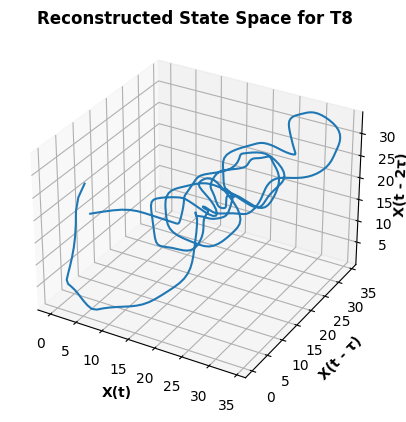

In [ ]:
# Load your shoulder joint displacement data here
# Example: load horizontal and vertical displacement data into x_data and y_data arrays

# Generate example data (replace this with your actual data)
# Example: generate synthetic data for demonstration purposes


# Calculate resultant displacement
resultant_data_t8 = np.sqrt(T8_hor**2 + T8_ver**2)

# Parameters for state space reconstruction
embedding_dimension = 3  # Embedding dimension
time_delay = 8  # Time delay

# State space reconstruction
num_samples = len(resultant_data_t8) - (embedding_dimension - 1) * time_delay
X = np.zeros((num_samples, embedding_dimension))
for i in range(embedding_dimension):
    X[:, i] = resultant_data_t8[i * time_delay:i * time_delay + num_samples]

# Plot the reconstructed state space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X[:, 0], X[:, 1], X[:, 2])
ax.set_xlabel('X(t)',fontweight='bold')
ax.set_ylabel('X(t - τ)',fontweight='bold')
ax.set_zlabel('X(t - 2τ)',fontweight='bold')
ax.zaxis.labelpad=-2
ax.set_title('Reconstructed State Space for T8',fontweight='bold')
plt.show()

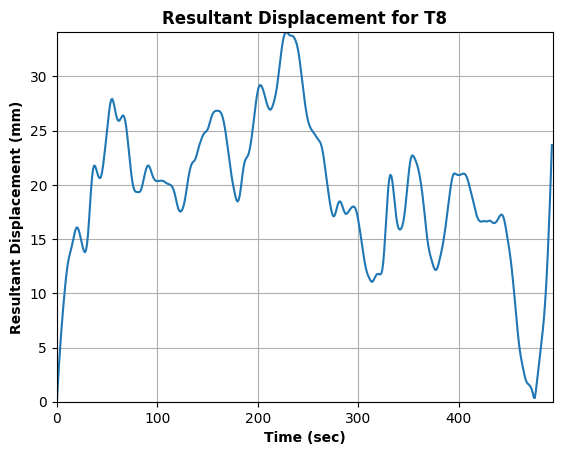

In [ ]:
import matplotlib.pyplot as plt
plt.plot(resultant_data_t8)
plt.xlabel('Time (sec)',fontweight='bold')
plt.ylabel('Resultant Displacement (mm)',fontweight='bold')
plt.title('Resultant Displacement for T8',fontweight='bold')
plt.axis([0, len(resultant_data_t8), 0, max(resultant_data_t8)])
plt.grid(True) # Set the plot boundaries
plt.show()

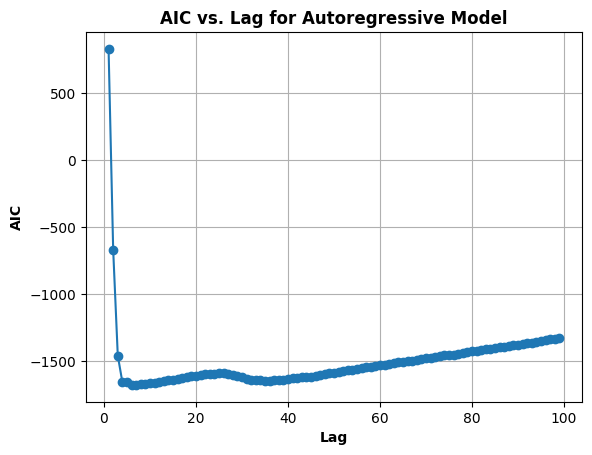

Optimal Lag (Time Delay): 7


In [ ]:

#t8
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Generate or load your time series data
# For demonstration purposes, let's generate a simple sinusoidal signal

signal = resultant_data_t8

# Function to fit an autoregressive model and calculate AIC
def fit_ar_model(data, lag):
    model = AutoReg(data, lags=lag)
    model_fit = model.fit()
    return model_fit.aic

# Range of lags to consider
max_lag = 100
lags = np.arange(1, max_lag)

# Fit autoregressive models for different lags and calculate AIC
aic_values = [fit_ar_model(signal, lag) for lag in lags]

# Plot AIC values
plt.plot(lags, aic_values, marker='o')
plt.title('AIC vs. Lag for Autoregressive Model',fontweight='bold')
plt.xlabel('Lag',fontweight='bold')
plt.ylabel('AIC',fontweight='bold')
plt.grid(True)
plt.show()

# Find the lag with the lowest AIC value
optimal_lag = lags[np.argmin(aic_values)]
print("Optimal Lag (Time Delay):", optimal_lag)


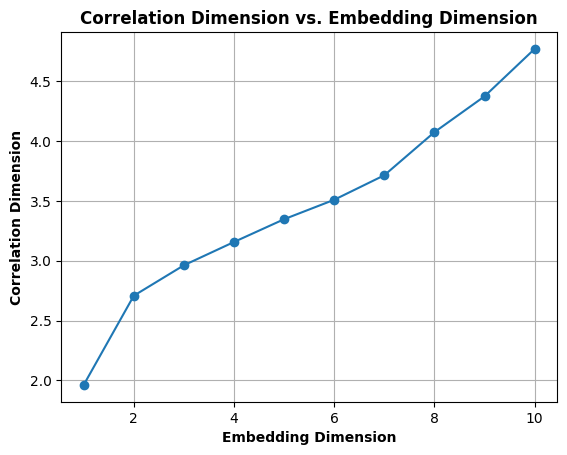

Optimal Embedding Dimension: 1


In [ ]:
# Generate or load your time series data
# For demonstration purposes, let's generate a simple sinusoidal signal

signal = resultant_data_t8

# Function to embed data in higher dimensions
def embed_data(data, dim):
    embedded_data = np.array([data[i:i+dim] for i in range(len(data)-dim+1)])
    return embedded_data

# Function to calculate correlation sum
def calculate_correlation_sum(data, dimension, radius):
    n = len(data)
    correlation_sum = 0
    for i in range(n):
        for j in range(i+1, n):
            distance = np.linalg.norm(data[i] - data[j])
            if distance <= radius:
                correlation_sum += 1
    return correlation_sum / (n * (n - 1) / 2)

# Function to calculate correlation dimension
def calculate_correlation_dimension(data, max_dim, radius):
    correlation_dimensions = []
    for dim in range(1, max_dim+1):
        embedded_data = embed_data(data, dim)
        correlation_sum = calculate_correlation_sum(embedded_data, dim, radius)
        correlation_dimension = np.log(correlation_sum) / np.log(radius)
        correlation_dimensions.append(correlation_dimension)
    return correlation_dimensions

# Set parameters
max_dim = 10  # Maximum embedding dimension to consider
radius = 0.1  # Radius for calculating correlation sum

# Calculate correlation dimension for each embedding dimension
correlation_dimensions = calculate_correlation_dimension(signal, max_dim, radius)

# Plot correlation dimensions
plt.plot(range(1, max_dim+1), correlation_dimensions, marker='o')
plt.title("Correlation Dimension vs. Embedding Dimension",fontweight='bold')
plt.xlabel("Embedding Dimension",fontweight='bold')
plt.ylabel("Correlation Dimension",fontweight='bold')
plt.grid(True)
plt.show()

# Find the embedding dimension where the correlation dimension plateaus
optimal_dim = np.argmax(np.gradient(correlation_dimensions)) + 1
print("Optimal Embedding Dimension:", optimal_dim)


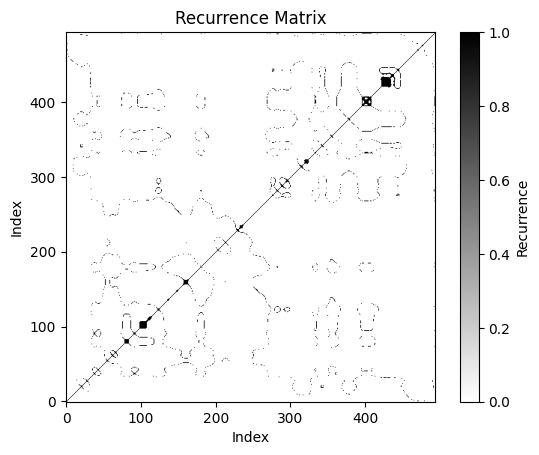

In [ ]:
#t8

def embed_time_series(data, dimension):
    """
    Embeds a time series into a higher-dimensional space using a delay embedding method.

    Parameters:
        data (array-like): The time series data.
        dimension (int): The embedding dimension.

    Returns:
        embedded_data (2D array): The embedded data matrix.
    """
    N = len(data)
    embedded_data = np.zeros((N - dimension + 1, dimension))
    for i in range(N - dimension + 1):
        embedded_data[i] = data[i:i + dimension]
    return embedded_data

def calculate_distance_matrix(embedded_data):
    """
    Calculates the distance matrix for the embedded data.

    Parameters:
        embedded_data (2D array): The embedded data matrix.

    Returns:
        distance_matrix (2D array): The distance matrix.
    """
    N = len(embedded_data)
    distance_matrix = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            distance_matrix[i, j] = np.linalg.norm(embedded_data[i] - embedded_data[j])
    return distance_matrix

def plot_recurrence_matrix(distance_matrix, threshold):
    """
    Plots the recurrence matrix.

    Parameters:
        distance_matrix (2D array): The distance matrix.
        threshold (float): The threshold for recurrence.
    """
    recurrence_matrix = np.zeros_like(distance_matrix)
    recurrence_matrix[distance_matrix < threshold] = 1

    plt.imshow(recurrence_matrix, cmap='binary', origin='lower')
    plt.title('Recurrence Matrix')
    plt.xlabel('Index')
    plt.ylabel('Index')
    plt.colorbar(label='Recurrence')
    plt.show()

# Example usage
# Generate a simple time series
data = resultant_data_t8

# Embed the time series into a higher-dimensional space
embedded_data = embed_time_series(data, dimension=1)

# Calculate the distance matrix
distance_matrix = calculate_distance_matrix(embedded_data)

# Set a recurrence threshold (you may need to adjust this based on your data)
threshold = 0.1

# Plot the recurrence matrix
plot_recurrence_matrix(distance_matrix, threshold)


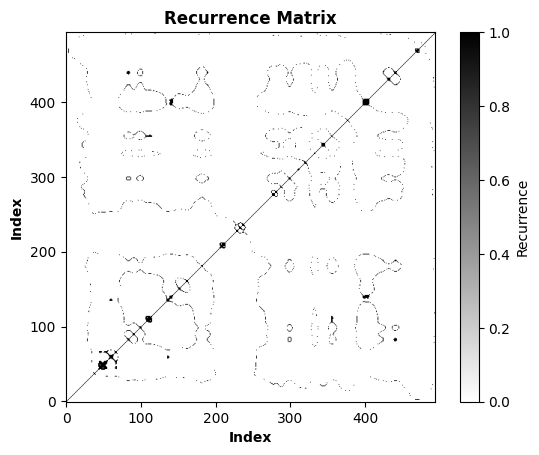

In [ ]:
def embed_time_series(data, dimension):
    """
    Embeds a time series into a higher-dimensional space using a delay embedding method.

    Parameters:
        data (array-like): The time series data.
        dimension (int): The embedding dimension.

    Returns:
        embedded_data (2D array): The embedded data matrix.
    """
    N = len(data)
    embedded_data = np.zeros((N - dimension + 1, dimension))
    for i in range(N - dimension + 1):
        embedded_data[i] = data[i:i + dimension]
    return embedded_data

def calculate_distance_matrix(embedded_data):
    """
    Calculates the distance matrix for the embedded data.

    Parameters:
        embedded_data (2D array): The embedded data matrix.

    Returns:
        distance_matrix (2D array): The distance matrix.
    """
    N = len(embedded_data)
    distance_matrix = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            distance_matrix[i, j] = np.linalg.norm(embedded_data[i] - embedded_data[j])
    return distance_matrix

def plot_recurrence_matrix(distance_matrix, threshold):
    """
    Plots the recurrence matrix.

    Parameters:
        distance_matrix (2D array): The distance matrix.
        threshold (float): The threshold for recurrence.
    """
    recurrence_matrix = np.zeros_like(distance_matrix)
    recurrence_matrix[distance_matrix < threshold] = 1

    plt.imshow(recurrence_matrix, cmap='binary', origin='lower')
    plt.title('Recurrence Matrix',fontweight='bold')
    plt.xlabel('Index',fontweight='bold')
    plt.ylabel('Index',fontweight='bold')
    plt.colorbar(label='Recurrence')
    plt.show()

# Example usage
# Generate a simple time series
data = resultant_data_c7

# Embed the time series into a higher-dimensional space
embedded_data = embed_time_series(data, dimension=1)

# Calculate the distance matrix
distance_matrix = calculate_distance_matrix(embedded_data)

# Set a recurrence threshold (you may need to adjust this based on your data)
threshold = 0.1

# Plot the recurrence matrix
plot_recurrence_matrix(distance_matrix, threshold)


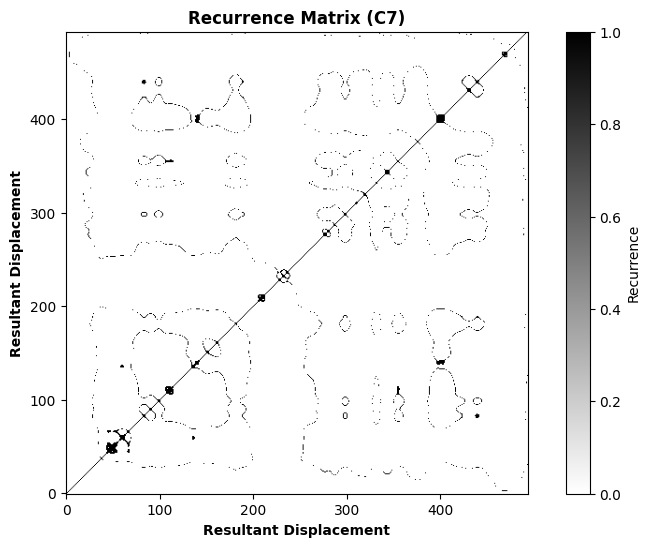

Recurrence Rate: 0.012973495713747151
Determinism: 38.61813013265951
Average Diagonal Length: 247.5
Maximum Diagonal Length: 494


In [ ]:
#c7
import numpy as np
import matplotlib.pyplot as plt

def state_space_reconstruction(series, embedding_dimension, time_delay):
    """
    Perform state space reconstruction using time delay embedding.

    Parameters:
        series (ndarray): Input time series.
        embedding_dimension (int): Dimension of the reconstructed state space.
        time_delay (int): Time delay used for embedding.

    Returns:
        ndarray: Reconstructed state space.
    """
    N = len(series)
    embedded_space = np.zeros((N - (embedding_dimension - 1) * time_delay, embedding_dimension))

    for i in range(embedding_dimension):
        embedded_space[:, i] = series[i * time_delay : i * time_delay + len(embedded_space)]

    return embedded_space

def calculate_recurrence_matrix(state_space, threshold):
    """
    Calculate recurrence matrix based on the state space.

    Parameters:
        state_space (ndarray): Reconstructed state space.
        threshold (float): Recurrence threshold.

    Returns:
        ndarray: Recurrence matrix.
    """
    N = len(state_space)
    recurrence_matrix = np.zeros((N, N))

    for i in range(N):
        for j in range(N):
            if np.linalg.norm(state_space[i] - state_space[j]) < threshold:
                recurrence_matrix[i, j] = 1

    return recurrence_matrix

def calculate_recurrence_quantification_measures(recurrence_matrix):
    """
    Calculate recurrence quantification measures.

    Parameters:
        recurrence_matrix (ndarray): Recurrence matrix.

    Returns:
        float: Recurrence rate.
        float: Determinism.
        float: Average diagonal line length.
        float: Maximum diagonal line length.
    """
    N = len(recurrence_matrix)
    num_recurrences = np.sum(recurrence_matrix)

    recurrence_rate = num_recurrences / (N * N)

    diagonal_lengths = []
    for i in range(N):
        j = i
        length = 0
        while j < N and recurrence_matrix[j, j] == 1:
            length += 1
            j += 1
        if length > 0:
            diagonal_lengths.append(length)

    determinism = np.sum(np.array(diagonal_lengths)) / num_recurrences

    if len(diagonal_lengths) > 0:
        avg_diagonal_length = np.mean(diagonal_lengths)
        max_diagonal_length = np.max(diagonal_lengths)
    else:
        avg_diagonal_length = 0
        max_diagonal_length = 0

    return recurrence_rate, determinism, avg_diagonal_length, max_diagonal_length

# Generate example time series


x = resultant_data_c7

# Parameters for state space reconstruction
embedding_dimension = 1
time_delay = 7

# Parameters for recurrence quantification analysis
threshold = 0.1

# Perform state space reconstruction
state_space = state_space_reconstruction(x, embedding_dimension, time_delay)

# Calculate recurrence matrix
recurrence_matrix = calculate_recurrence_matrix(state_space, threshold)

# Calculate recurrence quantification measures
recurrence_rate, determinism, avg_diagonal_length, max_diagonal_length = calculate_recurrence_quantification_measures(recurrence_matrix)

# Plotting
plt.figure(figsize=(10, 6))
plt.imshow(recurrence_matrix, cmap='binary', origin='lower')
plt.title('Recurrence Matrix (C7)',fontweight='bold')
plt.xlabel('Resultant Displacement',fontweight='bold')
plt.ylabel('Resultant Displacement',fontweight='bold')
plt.colorbar(label='Recurrence')
plt.show()

print("Recurrence Rate:", recurrence_rate)
print("Determinism:", determinism)
print("Average Diagonal Length:", avg_diagonal_length)
print("Maximum Diagonal Length:", max_diagonal_length)

In [ ]:
import numpy as np

def euclidean_distance(x, y):
    """
    Calculate the Euclidean distance between two points x and y.
    """
    return np.sqrt(np.sum((x - y)**2))

def recurrence_matrix(time_series, threshold):
    """
    Generate a binary recurrence matrix based on the given time series and threshold.
    """
    n = len(time_series)
    R = np.zeros((n, n), dtype=int)
    for i in range(n):
        for j in range(n):
            if euclidean_distance(time_series[i], time_series[j]) < threshold:
                R[i, j] = 1
    return R

def recurrence_entropy(time_series, threshold, dimension):
    """
    Compute the recurrence entropy of the given time series.
    """
    R = recurrence_matrix(time_series, threshold)
    n = len(R)
    m = dimension

    # Count the number of recurrent points for each point in the time series
    recurrent_points = np.sum(R, axis=1)

    # Calculate the probability distribution of recurrence points
    prob = recurrent_points / n

    # Compute the recurrence entropy
    entropy = 0
    for i in range(n):
        if prob[i] > 0:
            entropy += prob[i] * np.log(prob[i])

    return -entropy

# Example usage:
# Assuming you have a time series 'data' which is a numpy array of shape (N, d)
# where N is the number of data points and d is the dimensionality of each point.

# Set the parameters
threshold = 0.1  # Adjust according to your specific problem
embedding_dimension = 3  # Adjust according to your specific problem

# Compute recurrence entropy
entropy = recurrence_entropy(resultant_data_c7, threshold, embedding_dimension)
print("Recurrence Entropy L-AI:", entropy)

Recurrence Entropy L-AI: 26.44388197786545


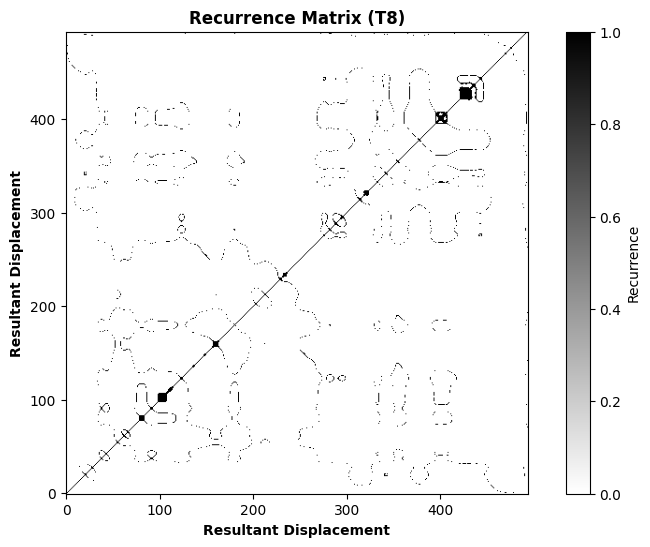

Recurrence Rate: 0.012916127128784278
Determinism: 38.78965736040609
Average Diagonal Length: 247.5
Maximum Diagonal Length: 494


In [ ]:
#T8
import numpy as np
import matplotlib.pyplot as plt

def state_space_reconstruction(series, embedding_dimension, time_delay):
    """
    Perform state space reconstruction using time delay embedding.

    Parameters:
        series (ndarray): Input time series.
        embedding_dimension (int): Dimension of the reconstructed state space.
        time_delay (int): Time delay used for embedding.

    Returns:
        ndarray: Reconstructed state space.
    """
    N = len(series)
    embedded_space = np.zeros((N - (embedding_dimension - 1) * time_delay, embedding_dimension))

    for i in range(embedding_dimension):
        embedded_space[:, i] = series[i * time_delay : i * time_delay + len(embedded_space)]

    return embedded_space

def calculate_recurrence_matrix(state_space, threshold):
    """
    Calculate recurrence matrix based on the state space.

    Parameters:
        state_space (ndarray): Reconstructed state space.
        threshold (float): Recurrence threshold.

    Returns:
        ndarray: Recurrence matrix.
    """
    N = len(state_space)
    recurrence_matrix = np.zeros((N, N))

    for i in range(N):
        for j in range(N):
            if np.linalg.norm(state_space[i] - state_space[j]) < threshold:
                recurrence_matrix[i, j] = 1

    return recurrence_matrix

def calculate_recurrence_quantification_measures(recurrence_matrix):
    """
    Calculate recurrence quantification measures.

    Parameters:
        recurrence_matrix (ndarray): Recurrence matrix.

    Returns:
        float: Recurrence rate.
        float: Determinism.
        float: Average diagonal line length.
        float: Maximum diagonal line length.
    """
    N = len(recurrence_matrix)
    num_recurrences = np.sum(recurrence_matrix)

    recurrence_rate = num_recurrences / (N * N)

    diagonal_lengths = []
    for i in range(N):
        j = i
        length = 0
        while j < N and recurrence_matrix[j, j] == 1:
            length += 1
            j += 1
        if length > 0:
            diagonal_lengths.append(length)

    determinism = np.sum(np.array(diagonal_lengths)) / num_recurrences

    if len(diagonal_lengths) > 0:
        avg_diagonal_length = np.mean(diagonal_lengths)
        max_diagonal_length = np.max(diagonal_lengths)
    else:
        avg_diagonal_length = 0
        max_diagonal_length = 0

    return recurrence_rate, determinism, avg_diagonal_length, max_diagonal_length

# Generate example time series
resultant_data_t8 = np.sqrt(T8_hor**2 + T8_ver**2)
data = resultant_data_t8

x = data

# Parameters for state space reconstruction
embedding_dimension = 1
time_delay = 7

# Parameters for recurrence quantification analysis
threshold = 0.1

# Perform state space reconstruction
state_space = state_space_reconstruction(x, embedding_dimension, time_delay)

# Calculate recurrence matrix
recurrence_matrix = calculate_recurrence_matrix(state_space, threshold)

# Calculate recurrence quantification measures
recurrence_rate, determinism, avg_diagonal_length, max_diagonal_length = calculate_recurrence_quantification_measures(recurrence_matrix)

# Plotting
plt.figure(figsize=(10, 6))
plt.imshow(recurrence_matrix, cmap='binary', origin='lower')
plt.title('Recurrence Matrix (T8)',fontweight='bold')
plt.xlabel('Resultant Displacement',fontweight='bold')
plt.ylabel('Resultant Displacement',fontweight='bold')
plt.colorbar(label='Recurrence')
plt.show()

print("Recurrence Rate:", recurrence_rate)
print("Determinism:", determinism)
print("Average Diagonal Length:", avg_diagonal_length)
print("Maximum Diagonal Length:", max_diagonal_length)


In [ ]:
import numpy as np

def euclidean_distance(x, y):
    """
    Calculate the Euclidean distance between two points x and y.
    """
    return np.sqrt(np.sum((x - y)**2))

def recurrence_matrix(time_series, threshold):
    """
    Generate a binary recurrence matrix based on the given time series and threshold.
    """
    n = len(time_series)
    R = np.zeros((n, n), dtype=int)
    for i in range(n):
        for j in range(n):
            if euclidean_distance(time_series[i], time_series[j]) < threshold:
                R[i, j] = 1
    return R

def recurrence_entropy(time_series, threshold, dimension):
    """
    Compute the recurrence entropy of the given time series.
    """
    R = recurrence_matrix(time_series, threshold)
    n = len(R)
    m = dimension

    # Count the number of recurrent points for each point in the time series
    recurrent_points = np.sum(R, axis=1)

    # Calculate the probability distribution of recurrence points
    prob = recurrent_points / n

    # Compute the recurrence entropy
    entropy = 0
    for i in range(n):
        if prob[i] > 0:
            entropy += prob[i] * np.log(prob[i])

    return -entropy

# Example usage:
# Assuming you have a time series 'data' which is a numpy array of shape (N, d)
# where N is the number of data points and d is the dimensionality of each point.

# Set the parameters
threshold = 0.1  # Adjust according to your specific problem
embedding_dimension = 3  # Adjust according to your specific problem

# Compute recurrence entropy
entropy = recurrence_entropy(resultant_data_t8, threshold, embedding_dimension)
print("Recurrence Entropy L-AI:", entropy)

Recurrence Entropy L-AI: 26.30528586975639


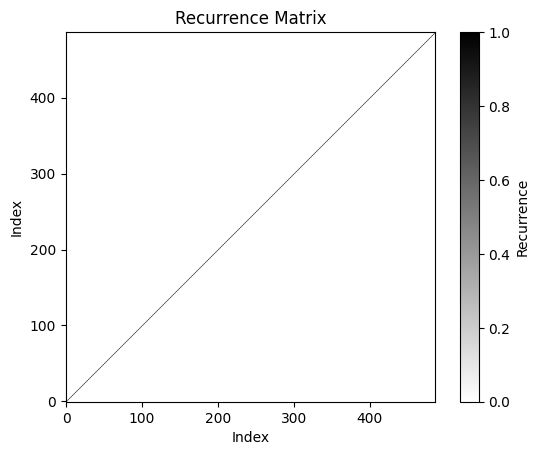

In [ ]:

# l-ts
def embed_time_series(data, dimension):
    """
    Embeds a time series into a higher-dimensional space using a delay embedding method.

    Parameters:
        data (array-like): The time series data.
        dimension (int): The embedding dimension.

    Returns:
        embedded_data (2D array): The embedded data matrix.
    """
    N = len(data)
    embedded_data = np.zeros((N - dimension + 1, dimension))
    for i in range(N - dimension + 1):
        embedded_data[i] = data[i:i + dimension]
    return embedded_data

def calculate_distance_matrix(embedded_data):
    """
    Calculates the distance matrix for the embedded data.

    Parameters:
        embedded_data (2D array): The embedded data matrix.

    Returns:
        distance_matrix (2D array): The distance matrix.
    """
    N = len(embedded_data)
    distance_matrix = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            distance_matrix[i, j] = np.linalg.norm(embedded_data[i] - embedded_data[j])
    return distance_matrix

def plot_recurrence_matrix(distance_matrix, threshold):
    """
    Plots the recurrence matrix.

    Parameters:
        distance_matrix (2D array): The distance matrix.
        threshold (float): The threshold for recurrence.
    """
    recurrence_matrix = np.zeros_like(distance_matrix)
    recurrence_matrix[distance_matrix < threshold] = 1

    plt.imshow(recurrence_matrix, cmap='binary', origin='lower')
    plt.title('Recurrence Matrix')
    plt.xlabel('Index')
    plt.ylabel('Index')
    plt.colorbar(label='Recurrence')
    plt.show()

# Example usage
# Generate a simple time series
data = resultant_data_l_ts

# Embed the time series into a higher-dimensional space
embedded_data = embed_time_series(data, dimension=8)

# Calculate the distance matrix
distance_matrix = calculate_distance_matrix(embedded_data)

# Set a recurrence threshold (you may need to adjust this based on your data)
threshold = 0.1

# Plot the recurrence matrix
plot_recurrence_matrix(distance_matrix, threshold)


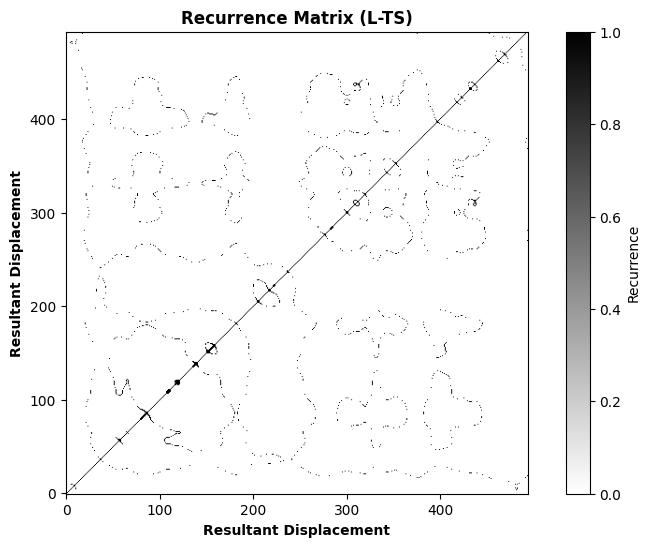

Recurrence Rate: 0.008933108229933288
Determinism: 56.0848623853211
Average Diagonal Length: 247.5
Maximum Diagonal Length: 494


In [ ]:
#L-TS
import numpy as np
import matplotlib.pyplot as plt

def state_space_reconstruction(series, embedding_dimension, time_delay):
    """
    Perform state space reconstruction using time delay embedding.

    Parameters:
        series (ndarray): Input time series.
        embedding_dimension (int): Dimension of the reconstructed state space.
        time_delay (int): Time delay used for embedding.

    Returns:
        ndarray: Reconstructed state space.
    """
    N = len(series)
    embedded_space = np.zeros((N - (embedding_dimension - 1) * time_delay, embedding_dimension))

    for i in range(embedding_dimension):
        embedded_space[:, i] = series[i * time_delay : i * time_delay + len(embedded_space)]

    return embedded_space

def calculate_recurrence_matrix(state_space, threshold):
    """
    Calculate recurrence matrix based on the state space.

    Parameters:
        state_space (ndarray): Reconstructed state space.
        threshold (float): Recurrence threshold.

    Returns:
        ndarray: Recurrence matrix.
    """
    N = len(state_space)
    recurrence_matrix = np.zeros((N, N))

    for i in range(N):
        for j in range(N):
            if np.linalg.norm(state_space[i] - state_space[j]) < threshold:
                recurrence_matrix[i, j] = 1

    return recurrence_matrix

def calculate_recurrence_quantification_measures(recurrence_matrix):
    """
    Calculate recurrence quantification measures.

    Parameters:
        recurrence_matrix (ndarray): Recurrence matrix.

    Returns:
        float: Recurrence rate.
        float: Determinism.
        float: Average diagonal line length.
        float: Maximum diagonal line length.
    """
    N = len(recurrence_matrix)
    num_recurrences = np.sum(recurrence_matrix)

    recurrence_rate = num_recurrences / (N * N)

    diagonal_lengths = []
    for i in range(N):
        j = i
        length = 0
        while j < N and recurrence_matrix[j, j] == 1:
            length += 1
            j += 1
        if length > 0:
            diagonal_lengths.append(length)

    determinism = np.sum(np.array(diagonal_lengths)) / num_recurrences

    if len(diagonal_lengths) > 0:
        avg_diagonal_length = np.mean(diagonal_lengths)
        max_diagonal_length = np.max(diagonal_lengths)
    else:
        avg_diagonal_length = 0
        max_diagonal_length = 0

    return recurrence_rate, determinism, avg_diagonal_length, max_diagonal_length

# Generate example time series


x = resultant_data_l_ts

# Parameters for state space reconstruction
embedding_dimension = 1
time_delay = 7

# Parameters for recurrence quantification analysis
threshold = 0.1

# Perform state space reconstruction
state_space = state_space_reconstruction(x, embedding_dimension, time_delay)

# Calculate recurrence matrix
recurrence_matrix = calculate_recurrence_matrix(state_space, threshold)

# Calculate recurrence quantification measures
recurrence_rate, determinism, avg_diagonal_length, max_diagonal_length = calculate_recurrence_quantification_measures(recurrence_matrix)

# Plotting
plt.figure(figsize=(10, 6))
plt.imshow(recurrence_matrix, cmap='binary', origin='lower')
plt.title('Recurrence Matrix (L-TS)',fontweight='bold')
plt.xlabel('Resultant Displacement',fontweight='bold')
plt.ylabel('Resultant Displacement',fontweight='bold')
plt.colorbar(label='Recurrence')
plt.show()

print("Recurrence Rate:", recurrence_rate)
print("Determinism:", determinism)
print("Average Diagonal Length:", avg_diagonal_length)
print("Maximum Diagonal Length:", max_diagonal_length)

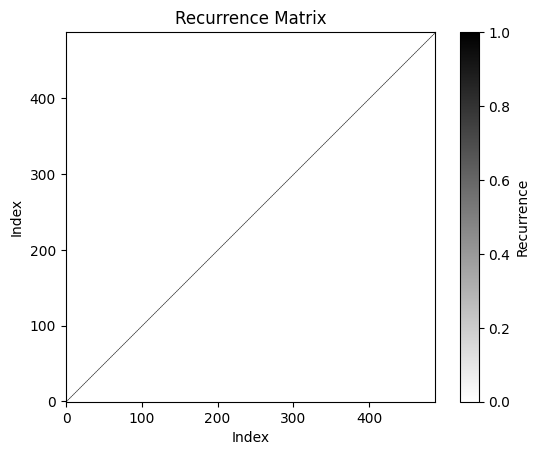

In [ ]:
def embed_time_series(data, dimension):
    """
    Embeds a time series into a higher-dimensional space using a delay embedding method.

    Parameters:
        data (array-like): The time series data.
        dimension (int): The embedding dimension.

    Returns:
        embedded_data (2D array): The embedded data matrix.
    """
    N = len(data)
    embedded_data = np.zeros((N - dimension + 1, dimension))
    for i in range(N - dimension + 1):
        embedded_data[i] = data[i:i + dimension]
    return embedded_data

def calculate_distance_matrix(embedded_data):
    """
    Calculates the distance matrix for the embedded data.

    Parameters:
        embedded_data (2D array): The embedded data matrix.

    Returns:
        distance_matrix (2D array): The distance matrix.
    """
    N = len(embedded_data)
    distance_matrix = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            distance_matrix[i, j] = np.linalg.norm(embedded_data[i] - embedded_data[j])
    return distance_matrix


def plot_recurrence_matrix(distance_matrix, threshold):
    """
    Plots the recurrence matrix.

    Parameters:
        distance_matrix (2D array): The distance matrix.
        threshold (float): The threshold for recurrence.
    """
    recurrence_matrix = np.zeros_like(distance_matrix)
    recurrence_matrix[distance_matrix < threshold] = 1

    plt.imshow(recurrence_matrix, cmap='binary', origin='lower')
    plt.title('Recurrence Matrix')
    plt.xlabel('Index')
    plt.ylabel('Index')
    plt.colorbar(label='Recurrence')
    plt.show()

# Example usage
# Generate a simple time series
resultant_data = np.sqrt(l_ai_hor**2 + l_ai_ver**2)
data = resultant_data

# Embed the time series into a higher-dimensional space
embedded_data = embed_time_series(data, dimension=7)

# Calculate the distance matrix
distance_matrix = calculate_distance_matrix(embedded_data)

# Set a recurrence threshold (you may need to adjust this based on your data)
threshold = 0.1

# Plot the recurrence matrix
plot_recurrence_matrix(distance_matrix, threshold)


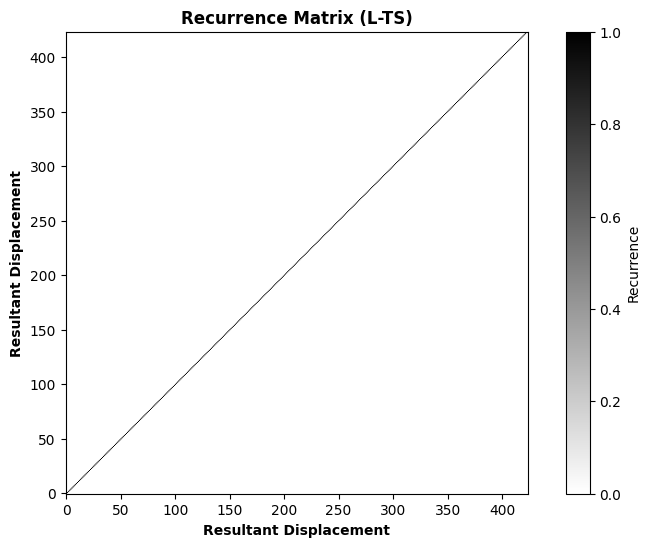

Recurrence Rate: 0.0023584905660377358
Determinism: 212.5
Average Diagonal Length: 212.5
Maximum Diagonal Length: 424


In [ ]:
#L-TS
import numpy as np
import matplotlib.pyplot as plt

def state_space_reconstruction(series, embedding_dimension, time_delay):
    """
    Perform state space reconstruction using time delay embedding.

    Parameters:
        series (ndarray): Input time series.
        embedding_dimension (int): Dimension of the reconstructed state space.
        time_delay (int): Time delay used for embedding.

    Returns:
        ndarray: Reconstructed state space.
    """
    N = len(series)
    embedded_space = np.zeros((N - (embedding_dimension - 1) * time_delay, embedding_dimension))

    for i in range(embedding_dimension):
        embedded_space[:, i] = series[i * time_delay : i * time_delay + len(embedded_space)]

    return embedded_space

def calculate_recurrence_matrix(state_space, threshold):
    """
    Calculate recurrence matrix based on the state space.

    Parameters:
        state_space (ndarray): Reconstructed state space.
        threshold (float): Recurrence threshold.

    Returns:
        ndarray: Recurrence matrix.
    """
    N = len(state_space)
    recurrence_matrix = np.zeros((N, N))

    for i in range(N):
        for j in range(N):
            if np.linalg.norm(state_space[i] - state_space[j]) < threshold:
                recurrence_matrix[i, j] = 1

    return recurrence_matrix

def calculate_recurrence_quantification_measures(recurrence_matrix):
    """
    Calculate recurrence quantification measures.

    Parameters:
        recurrence_matrix (ndarray): Recurrence matrix.

    Returns:
        float: Recurrence rate.
        float: Determinism.
        float: Average diagonal line length.
        float: Maximum diagonal line length.
    """
    N = len(recurrence_matrix)
    num_recurrences = np.sum(recurrence_matrix)

    recurrence_rate = num_recurrences / (N * N)

    diagonal_lengths = []
    for i in range(N):
        j = i
        length = 0
        while j < N and recurrence_matrix[j, j] == 1:
            length += 1
            j += 1
        if length > 0:
            diagonal_lengths.append(length)

    determinism = np.sum(np.array(diagonal_lengths)) / num_recurrences

    if len(diagonal_lengths) > 0:
        avg_diagonal_length = np.mean(diagonal_lengths)
        max_diagonal_length = np.max(diagonal_lengths)
    else:
        avg_diagonal_length = 0
        max_diagonal_length = 0

    return recurrence_rate, determinism, avg_diagonal_length, max_diagonal_length

# Generate example time series


x = resultant_data

# Parameters for state space reconstruction
embedding_dimension = 8
time_delay = 10

# Parameters for recurrence quantification analysis
threshold = 0.1

# Perform state space reconstruction
state_space = state_space_reconstruction(x, embedding_dimension, time_delay)

# Calculate recurrence matrix
recurrence_matrix = calculate_recurrence_matrix(state_space, threshold)

# Calculate recurrence quantification measures
recurrence_rate, determinism, avg_diagonal_length, max_diagonal_length = calculate_recurrence_quantification_measures(recurrence_matrix)


# Plotting
plt.figure(figsize=(10, 6))
plt.imshow(recurrence_matrix, cmap='binary', origin='lower')
plt.title('Recurrence Matrix (L-TS)',fontweight='bold')
plt.xlabel('Resultant Displacement',fontweight='bold')
plt.ylabel('Resultant Displacement',fontweight='bold')
plt.colorbar(label='Recurrence')
plt.show()

print("Recurrence Rate:", recurrence_rate)
print("Determinism:", determinism)
print("Average Diagonal Length:", avg_diagonal_length)
print("Maximum Diagonal Length:", max_diagonal_length)

Multi-dimensional State space Reconstruction

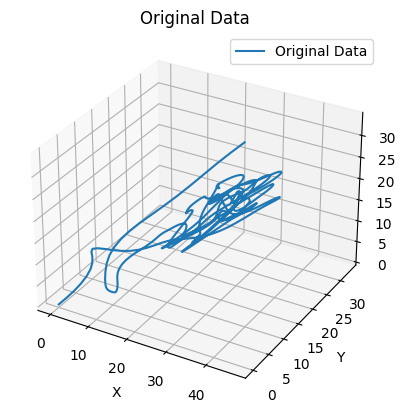

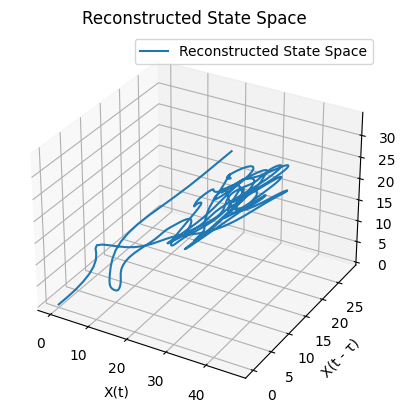

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic multivariate time series data with four variables

x = resultant_data_l_ts
y = resultant_data
z = resultant_data_c7
w = resultant_data_t8

# Stack the variables into a multivariate time series matrix
data = np.vstack((x, y, z, w)).T

# Define embedding parameters
embedding_dim = 3  # Embedding dimension
time_delay = 10    # Time delay

# Construct the embedding matrix
embedding_matrix = np.hstack([np.roll(data, -i*time_delay, axis=0)[:-embedding_dim+1] for i in range(embedding_dim)])

# Plot the original data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(data[:, 0], data[:, 1], data[:, 2], label='Original Data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.title('Original Data')
plt.show()

# Plot the reconstructed state space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(embedding_matrix[:, 0], embedding_matrix[:, 1], embedding_matrix[:, 2], label='Reconstructed State Space')
ax.set_xlabel('X(t)')
ax.set_ylabel('X(t - τ)')
ax.set_zlabel('X(t - 2τ)')
ax.legend()
plt.title('Reconstructed State Space')
plt.show()


In [ ]:
# prompt: create numpy array using resultant_data_l_ts , resultant_data, resultant_data_c7 ,resultant_data_t8

import numpy as np
multivariate_data = np.vstack((resultant_data_l_ts, resultant_data, resultant_data_c7, resultant_data_t8)).T
print(multivariate_data)


[[ 0.          0.          0.          0.        ]
 [ 1.0935839   1.21041294  1.1046957   1.67234664]
 [ 2.09903303  2.39958163  2.2557731   3.25044221]
 ...
 [18.30802194 28.44335683 20.17677566 18.39498583]
 [19.98029613 30.83815215 21.66505806 20.97605174]
 [21.7185566  33.29264666 23.09679731 23.68018091]]


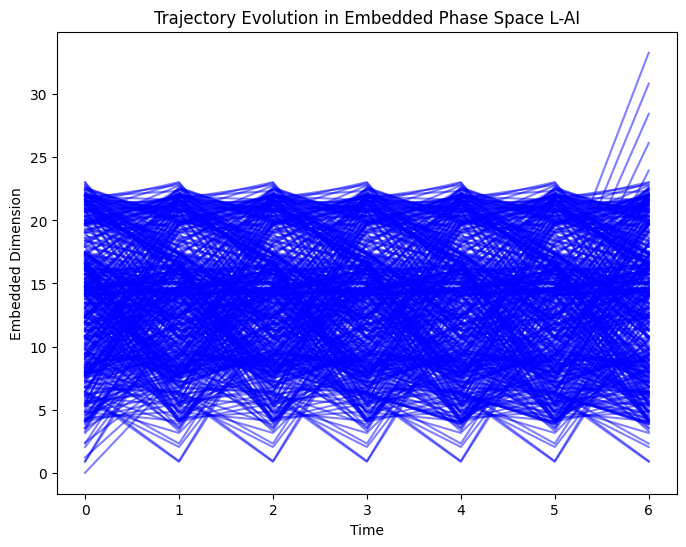

Finite-time Lyapunov exponent: 0.3724695051389434


In [ ]:
# Flte analyis for L-AI
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

def delay_embedding(time_series, embedding_dimension, time_delay):
    N = len(time_series)
    embedded_data = np.zeros((N - (embedding_dimension - 1) * time_delay, embedding_dimension))
    for i in range(embedding_dimension):
        embedded_data[:, i] = time_series[i * time_delay : i * time_delay + len(embedded_data)]
    return embedded_data
# Function to compute finite-time Lyapunov exponent and plot trajectory evolution
def compute_ftle_and_plot(time_series, embedding_dimension, time_delay, time_interval):
    # Embedding the time series
    embedded_data = delay_embedding(time_series, embedding_dimension, time_delay)

    # Initialize array to store Lyapunov exponents
    lyapunov_exponents = np.zeros(embedded_data.shape[0])

    # Plot parameters
    fig, ax = plt.subplots(figsize=(8, 6))

    # Loop through each point in embedded_data
    for i, point in enumerate(embedded_data):
        # Find nearest neighbors within a certain radius
        nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(embedded_data)
        distances, indices = nbrs.kneighbors(np.array([point]))

        # Compute the difference in distances between neighboring trajectories
        delta_dist = np.abs(distances[0][1] - distances[0][0])

        # Compute finite-time Lyapunov exponent
        lyapunov_exponents[i] = np.log(delta_dist) / time_interval

        # Plot trajectory evolution
        ax.plot(embedded_data[i, :], color='blue', alpha=0.5)

    # Set plot labels
    ax.set_xlabel('Time')
    ax.set_ylabel('Embedded Dimension')
    ax.set_title('Trajectory Evolution in Embedded Phase Space L-AI')

    # Show plot
    plt.show()

    # Average Lyapunov exponents over all points
    avg_lyapunov_exponent = np.mean(lyapunov_exponents)

    return avg_lyapunov_exponent

# Example usage
time_series = resultant_data  # Example time series data
embedding_dimension = 7
time_delay = 10
time_interval = 1.6

ftle = compute_ftle_and_plot(time_series, embedding_dimension, time_delay, time_interval)
print("Finite-time Lyapunov exponent:", ftle)


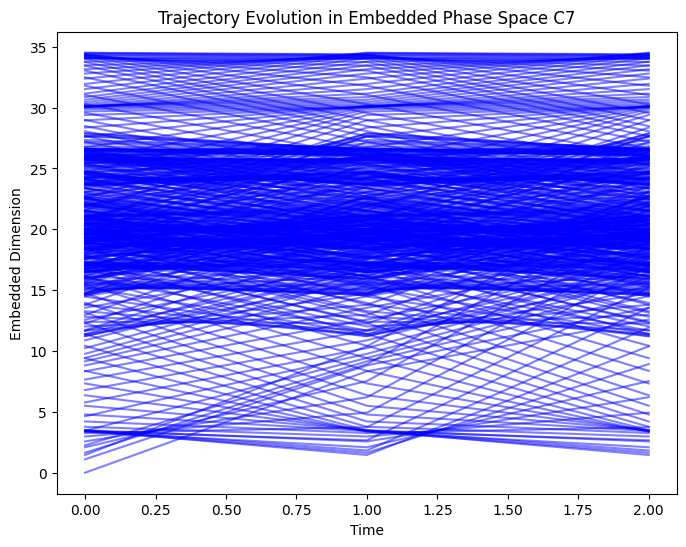

Finite-time Lyapunov exponent: -0.3230600090606374


In [ ]:
# Flte analyis for L-C7
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

def delay_embedding(time_series, embedding_dimension, time_delay):
    N = len(time_series)
    embedded_data = np.zeros((N - (embedding_dimension - 1) * time_delay, embedding_dimension))
    for i in range(embedding_dimension):
        embedded_data[:, i] = time_series[i * time_delay : i * time_delay + len(embedded_data)]
    return embedded_data
# Function to compute finite-time Lyapunov exponent and plot trajectory evolution
def compute_ftle_and_plot(time_series, embedding_dimension, time_delay, time_interval):
    # Embedding the time series
    embedded_data = delay_embedding(time_series, embedding_dimension, time_delay)

    # Initialize array to store Lyapunov exponents
    lyapunov_exponents = np.zeros(embedded_data.shape[0])

    # Plot parameters
    fig, ax = plt.subplots(figsize=(8, 6))

    # Loop through each point in embedded_data
    for i, point in enumerate(embedded_data):
        # Find nearest neighbors within a certain radius
        nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(embedded_data)
        distances, indices = nbrs.kneighbors(np.array([point]))

        # Compute the difference in distances between neighboring trajectories
        delta_dist = np.abs(distances[0][1] - distances[0][0])

        # Compute finite-time Lyapunov exponent
        lyapunov_exponents[i] = np.log(delta_dist) / time_interval

        # Plot trajectory evolution
        ax.plot(embedded_data[i, :], color='blue', alpha=0.5)

    # Set plot labels
    ax.set_xlabel('Time')
    ax.set_ylabel('Embedded Dimension')
    ax.set_title('Trajectory Evolution in Embedded Phase Space C7')

    # Show plot
    plt.show()

    # Average Lyapunov exponents over all points
    avg_lyapunov_exponent = np.mean(lyapunov_exponents)

    return avg_lyapunov_exponent

# Example usage
time_series = resultant_data_c7  # Example time series data
embedding_dimension = 3
time_delay = 8
time_interval = 1.6

ftle = compute_ftle_and_plot(time_series, embedding_dimension, time_delay, time_interval)
print("Finite-time Lyapunov exponent:", ftle)


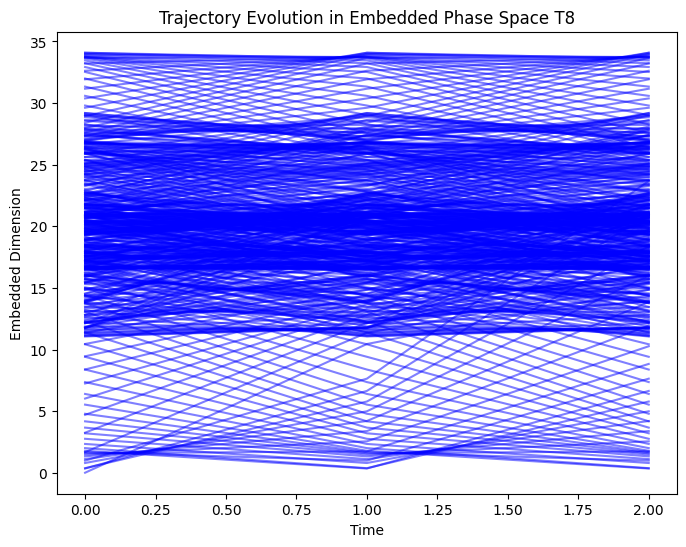

Finite-time Lyapunov exponent: -0.29048144460128417


In [ ]:
# Flte analyis for L-T8
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

def delay_embedding(time_series, embedding_dimension, time_delay):
    N = len(time_series)
    embedded_data = np.zeros((N - (embedding_dimension - 1) * time_delay, embedding_dimension))
    for i in range(embedding_dimension):
        embedded_data[:, i] = time_series[i * time_delay : i * time_delay + len(embedded_data)]
    return embedded_data
# Function to compute finite-time Lyapunov exponent and plot trajectory evolution
def compute_ftle_and_plot(time_series, embedding_dimension, time_delay, time_interval):
    # Embedding the time series
    embedded_data = delay_embedding(time_series, embedding_dimension, time_delay)

    # Initialize array to store Lyapunov exponents
    lyapunov_exponents = np.zeros(embedded_data.shape[0])

    # Plot parameters
    fig, ax = plt.subplots(figsize=(8, 6))

    # Loop through each point in embedded_data
    for i, point in enumerate(embedded_data):
        # Find nearest neighbors within a certain radius
        nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(embedded_data)
        distances, indices = nbrs.kneighbors(np.array([point]))

        # Compute the difference in distances between neighboring trajectories
        delta_dist = np.abs(distances[0][1] - distances[0][0])

        # Compute finite-time Lyapunov exponent
        lyapunov_exponents[i] = np.log(delta_dist) / time_interval

        # Plot trajectory evolution
        ax.plot(embedded_data[i, :], color='blue', alpha=0.5)

    # Set plot labels
    ax.set_xlabel('Time')
    ax.set_ylabel('Embedded Dimension')
    ax.set_title('Trajectory Evolution in Embedded Phase Space T8')

    # Show plot
    plt.show()

    # Average Lyapunov exponents over all points
    avg_lyapunov_exponent = np.mean(lyapunov_exponents)

    return avg_lyapunov_exponent

# Example usage
time_series = resultant_data_t8  # Example time series data
embedding_dimension = 3
time_delay = 8
time_interval = 1.6

ftle = compute_ftle_and_plot(time_series, embedding_dimension, time_delay, time_interval)
print("Finite-time Lyapunov exponent:", ftle)


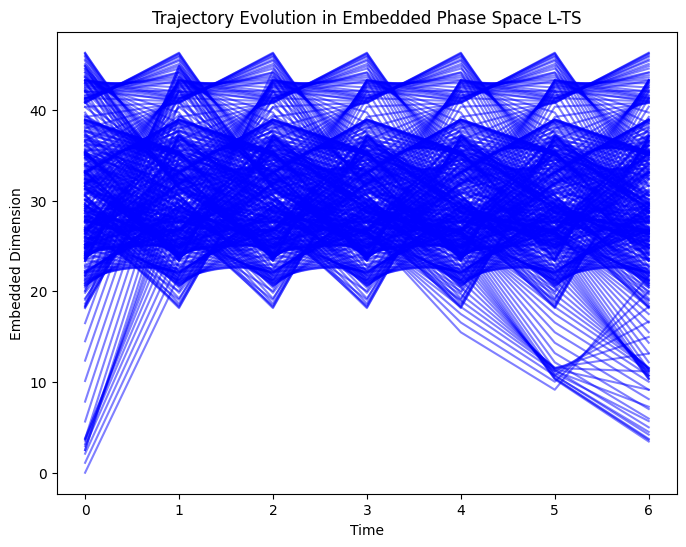

Finite-time Lyapunov exponent: 0.28558756080151465


In [ ]:
# Flte analyis for L-T8
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

def delay_embedding(time_series, embedding_dimension, time_delay):
    N = len(time_series)
    embedded_data = np.zeros((N - (embedding_dimension - 1) * time_delay, embedding_dimension))
    for i in range(embedding_dimension):
        embedded_data[:, i] = time_series[i * time_delay : i * time_delay + len(embedded_data)]
    return embedded_data
# Function to compute finite-time Lyapunov exponent and plot trajectory evolution
def compute_ftle_and_plot(time_series, embedding_dimension, time_delay, time_interval):
    # Embedding the time series
    embedded_data = delay_embedding(time_series, embedding_dimension, time_delay)

    # Initialize array to store Lyapunov exponents
    lyapunov_exponents = np.zeros(embedded_data.shape[0])

    # Plot parameters
    fig, ax = plt.subplots(figsize=(8, 6))

    # Loop through each point in embedded_data
    for i, point in enumerate(embedded_data):
        # Find nearest neighbors within a certain radius
        nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(embedded_data)
        distances, indices = nbrs.kneighbors(np.array([point]))

        # Compute the difference in distances between neighboring trajectories
        delta_dist = np.abs(distances[0][1] - distances[0][0])

        # Compute finite-time Lyapunov exponent
        lyapunov_exponents[i] = np.log(delta_dist) / time_interval

        # Plot trajectory evolution
        ax.plot(embedded_data[i, :], color='blue', alpha=0.5)

    # Set plot labels
    ax.set_xlabel('Time')
    ax.set_ylabel('Embedded Dimension')
    ax.set_title('Trajectory Evolution in Embedded Phase Space L-TS')

    # Show plot
    plt.show()

    # Average Lyapunov exponents over all points
    avg_lyapunov_exponent = np.mean(lyapunov_exponents)

    return avg_lyapunov_exponent

# Example usage
time_series = resultant_data_l_ts  # Example time series data
embedding_dimension = 7
time_delay = 19
time_interval = 1.6

ftle = compute_ftle_and_plot(time_series, embedding_dimension, time_delay, time_interval)
print("Finite-time Lyapunov exponent:", ftle)

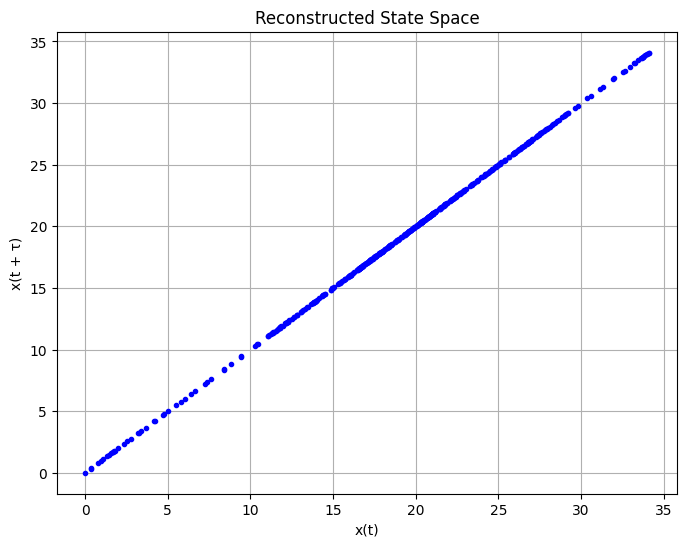

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to perform state space reconstruction
def state_space_reconstruction(data, embedding_dim, time_delay):
    N = len(data)
    embedded_data = np.zeros((N - (embedding_dim - 1) * time_delay, embedding_dim))

    for i in range(embedding_dim):
        embedded_data[:, i] = data[i * time_delay:N - (embedding_dim - i - 1) * time_delay]

    return embedded_data

# Generate example time series data (you can replace this with your own data)




data = resultant_data_t8

# Parameters for state space reconstruction
embedding_dim = 1  # Minimum embedding dimension
optimal_time_delay = 7  # Optimal time delay (you may need to adjust this)

# Perform state space reconstruction
embedded_data = state_space_reconstruction(data, embedding_dim, optimal_time_delay)

# Plot the reconstructed state space
plt.figure(figsize=(8, 6))
plt.plot(embedded_data[:, 0], embedded_data[:, 0], 'b.')  # Plot the state space
plt.title('Reconstructed State Space')
plt.xlabel('x(t)')
plt.ylabel('x(t + τ)')
plt.grid(True)
plt.show()
